In [1]:
%matplotlib notebook
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py
import scipy.io

In [2]:
file = 'fqpm_Z15_individual_400st_948nm_128px_15rad.hdf5'
#file = 'fqpm_50nm_256px_individual_zernikes.hdf5'
with h5py.File(file, 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 5600)
(128, 128, 5600)


In [3]:
print(coeffs[:,:3])

[[-9.48000000e-07 -9.43248120e-07 -9.38496241e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [18]:
K = 400
coeffs_sep = np.zeros((M,K,M))

In [19]:
for i in range(M):
    coeffs_sep[:,:,i] = coeffs[:,i*K:(i+1)*K]

In [20]:
coeffs_sep[:,:3,2]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.48000000e-07, -9.43248120e-07, -9.38496241e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [21]:
rec_coeffs = np.zeros(coeffs_sep.shape)
for i in range(M): #loop over coefficients
    for j in range(K): #loop over examples
        vec = np.reshape(images[:,:,i*K+j]-ref,(-1,)) 
        rec_coeffs[:,j,i] = np.dot(Apinv,vec)

In [22]:
print(rec_coeffs[:,:3,0])

[[ 0.05184437 -0.01871276 -0.08934195]
 [ 0.42962616  0.43148271  0.43331956]
 [-3.25619321 -3.18995636 -3.12531975]
 [ 0.40035447  0.40201733  0.40397472]
 [ 0.28160321  0.29261092  0.30265132]
 [ 0.43667322  0.43292205  0.42925147]
 [-2.8546526  -2.84737467 -2.83818956]
 [ 0.29973176  0.29994723  0.30028477]
 [ 0.90524568  0.90548984  0.90656935]
 [ 6.21311022  6.15259149  6.09282179]
 [ 0.82078108  0.79514252  0.76820919]
 [ 0.290268    0.28573211  0.28103835]
 [ 1.27247564  1.29865781  1.32365901]
 [ 0.28344811  0.28268514  0.28196648]]


<IPython.core.display.Javascript object>


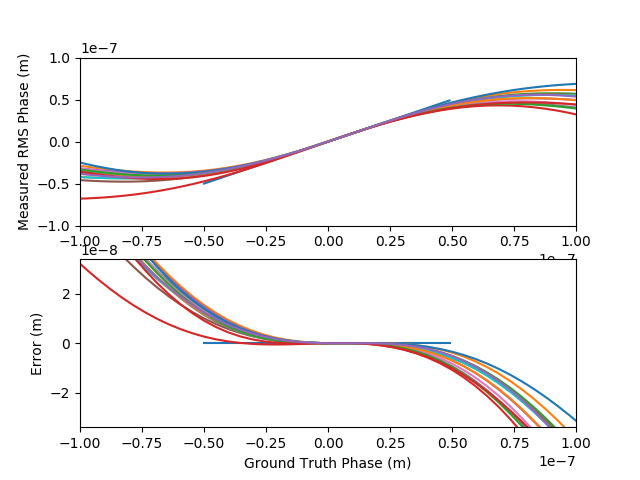

In [23]:
fig,ax = plt.subplots(2,1)
line1 = np.arange(-5e-8,5e-8,1e-9)
line0 = np.zeros(line1.shape)
ax[0].plot(line1,line1)
ax[1].plot(line1,line0)
for i in range(M):
#for i in [2,1,]:
    ax[0].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode)
    #ax[0].axis('equal')
    ax[0].set_xlim([-100e-9,100e-9])
    ax[0].set_ylim([-100e-9,100e-9])
    ax[0].set_ylabel('Measured RMS Phase (m)')
    #ax[0].legend(['None','1','2','3','4','5','6'])
    ax[1].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode-coeffs_sep[i,:,i])
    ax[1].axis('equal')
    ax[1].set_xlim([-100e-9,100e-9])
    ax[1].set_ylim([-10e-9,10e-9])
    ax[1].set_ylabel('Error (m)')
    ax[1].set_xlabel('Ground Truth Phase (m)')

<IPython.core.display.Javascript object>


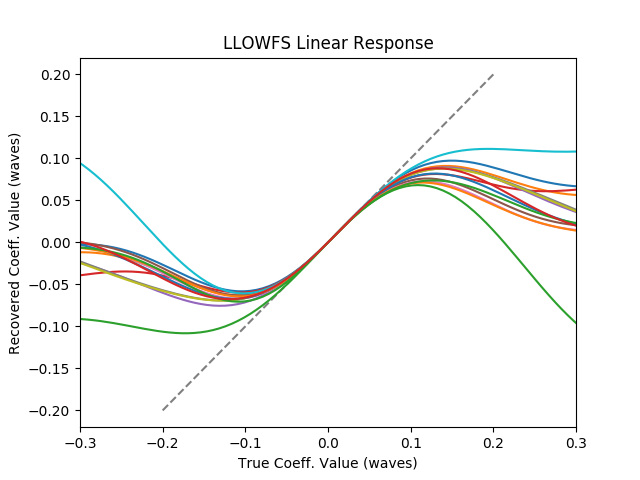

Text(0.5, 1.0, 'LLOWFS Linear Response')

In [28]:
plt.figure()
plt.plot([-0.2,0.2],[-0.2,0.2],linestyle='--',color='grey')
for i in range(M):
#for i in [2,1,]:
    truthWaves = coeffs_sep[i,:,i]/wavelength
    recWaves = rec_coeffs[i,:,i]*rms_phase_mode/wavelength
    plt.plot(truthWaves,recWaves)
plt.xlim([-0.3,0.3])
plt.xlabel('True Coeff. Value (waves)')
plt.ylabel('Recovered Coeff. Value (waves)')
plt.title('LLOWFS Linear Response')

<IPython.core.display.Javascript object>


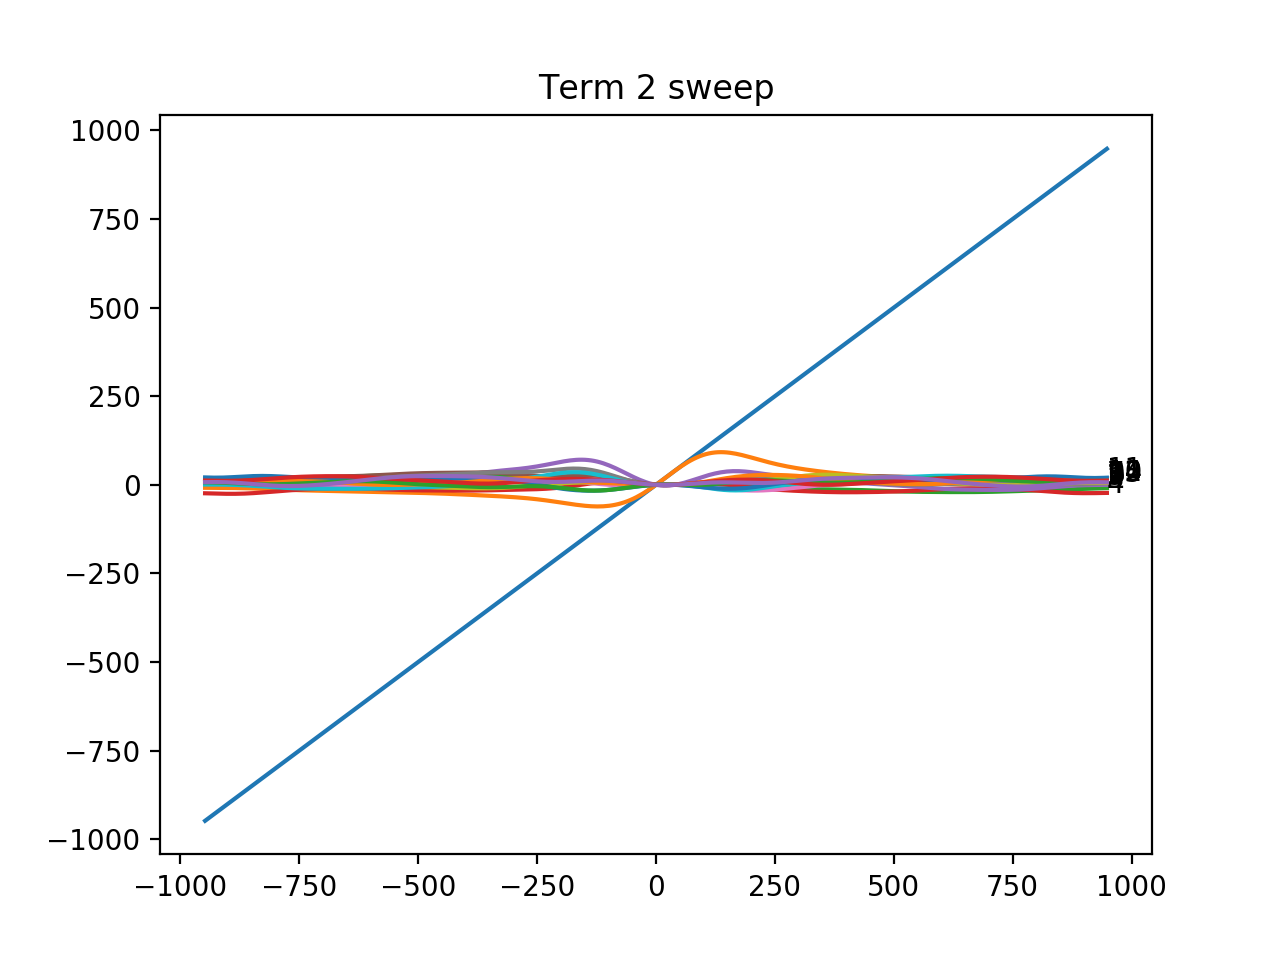

<IPython.core.display.Javascript object>


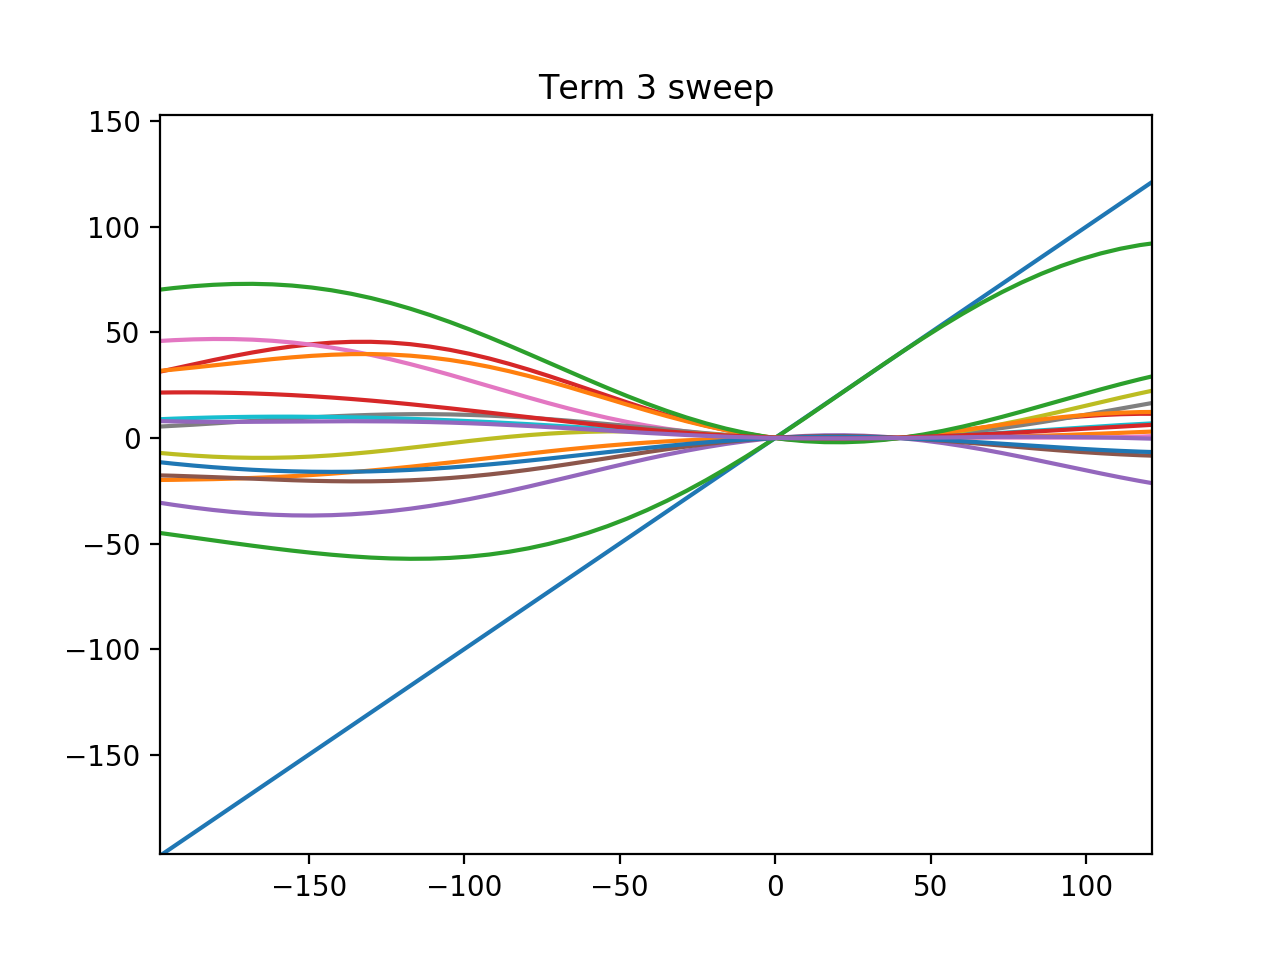

<IPython.core.display.Javascript object>


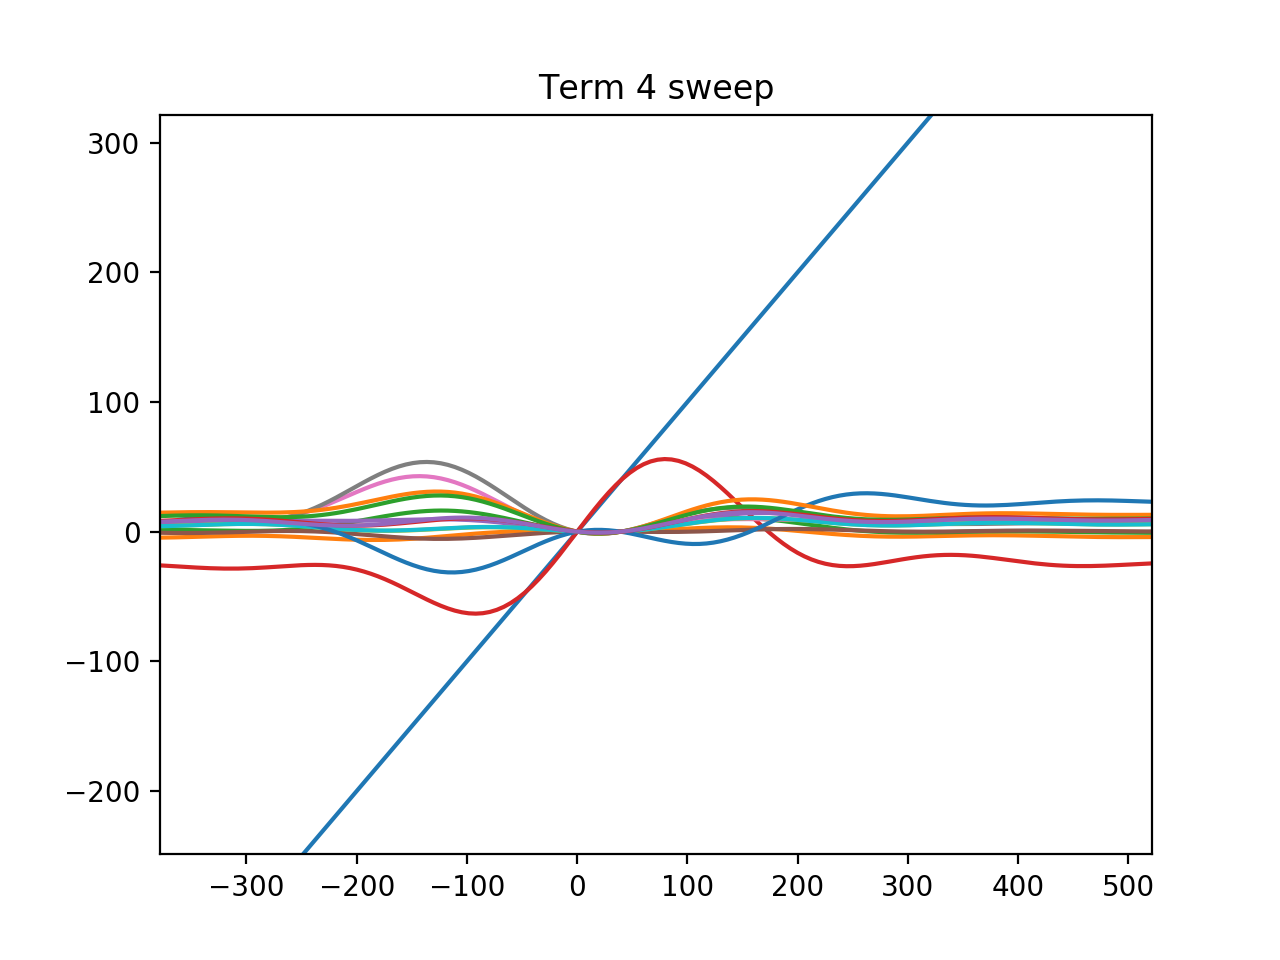

<IPython.core.display.Javascript object>


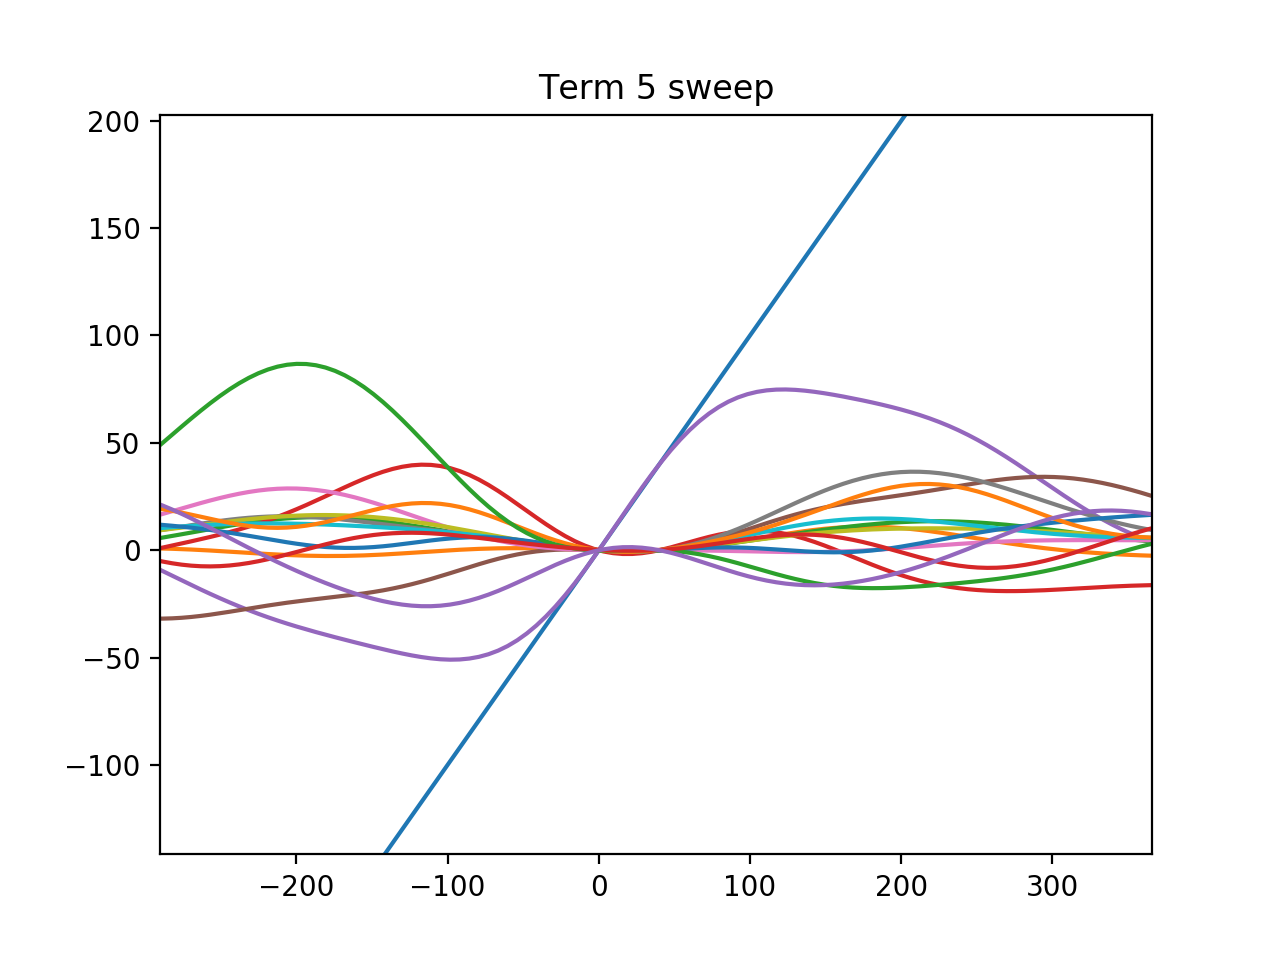

<IPython.core.display.Javascript object>


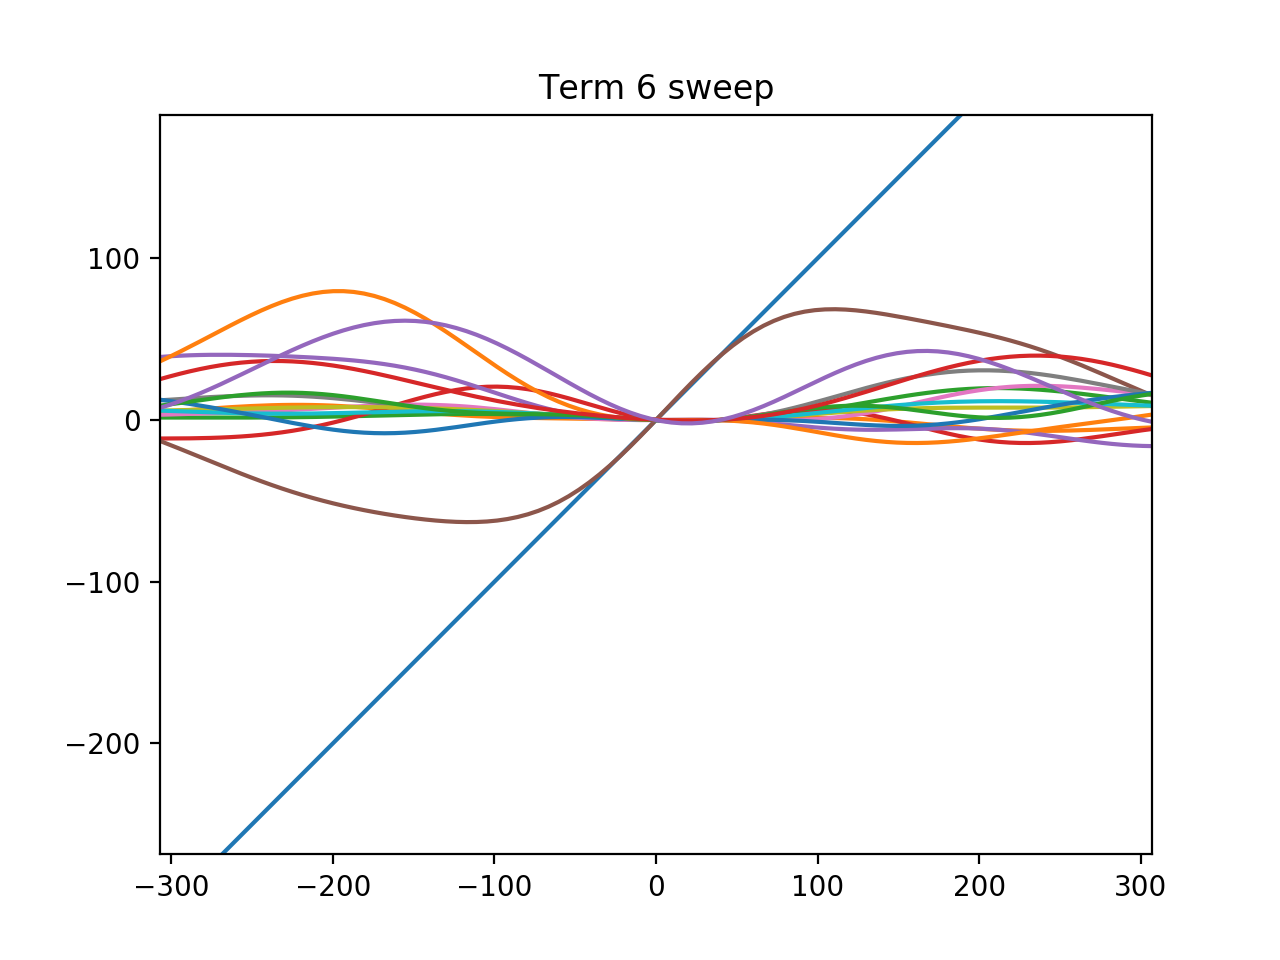

<IPython.core.display.Javascript object>


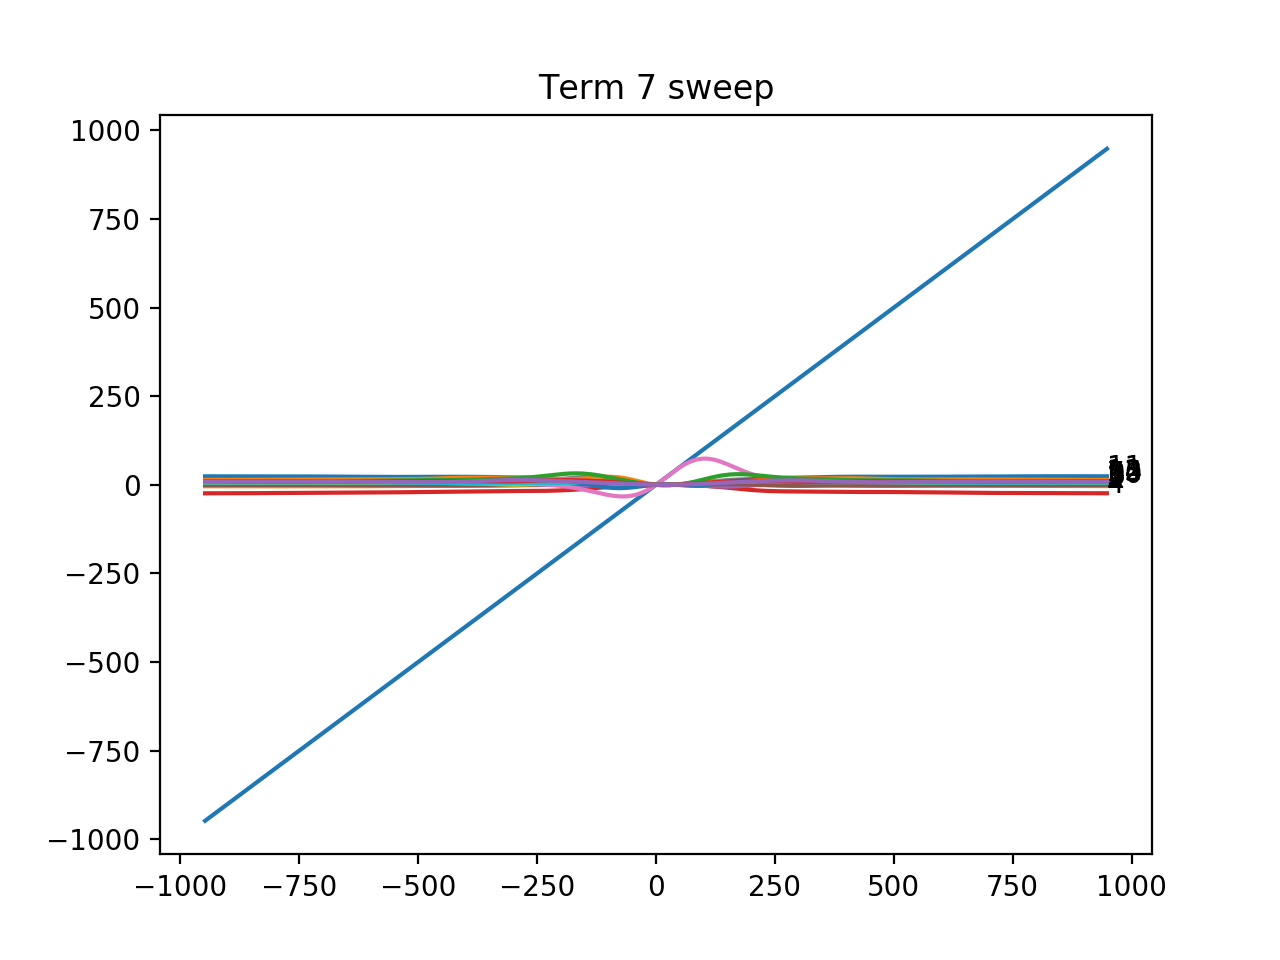

<IPython.core.display.Javascript object>


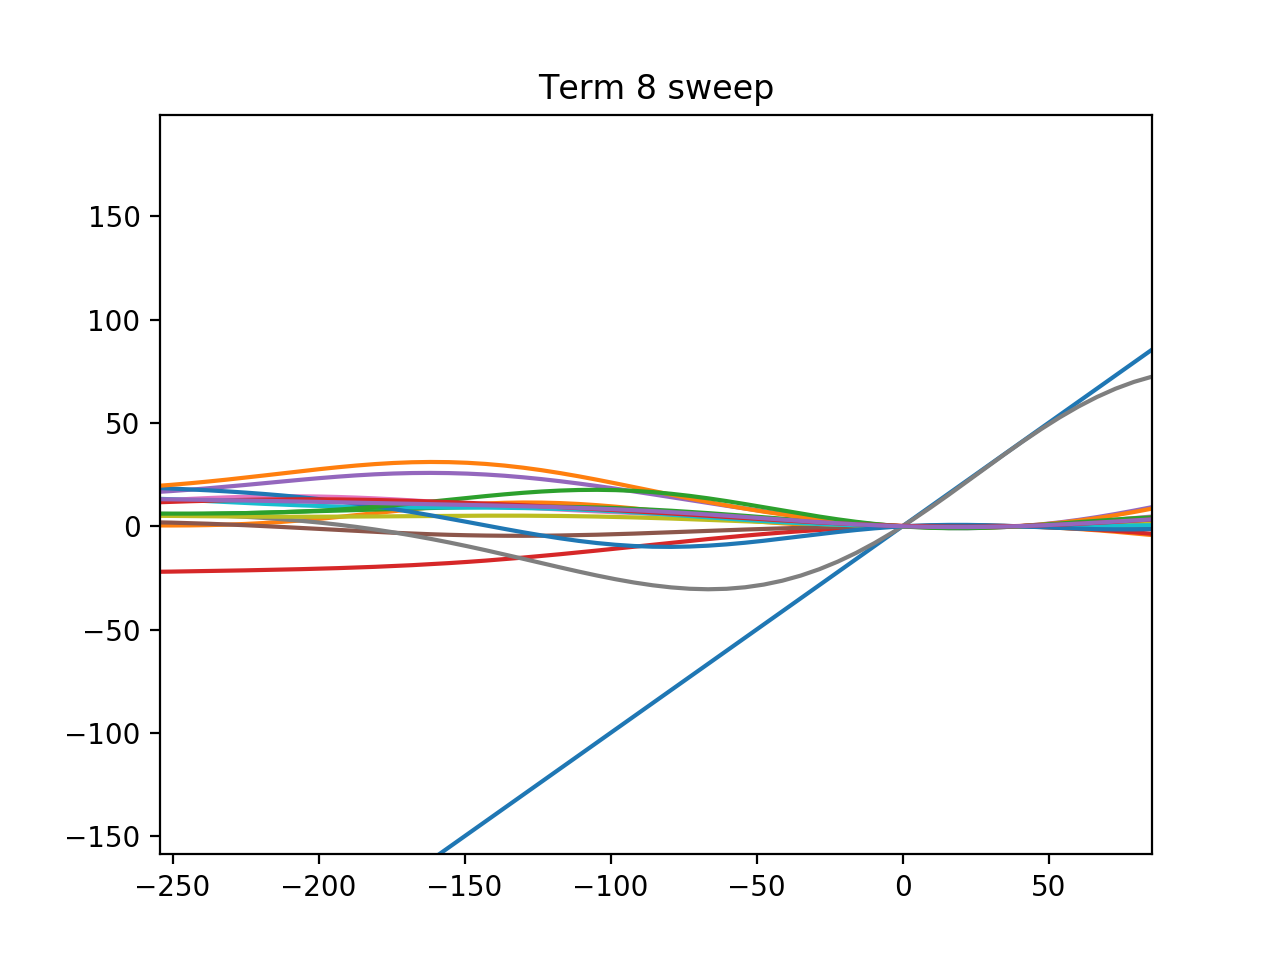

<IPython.core.display.Javascript object>


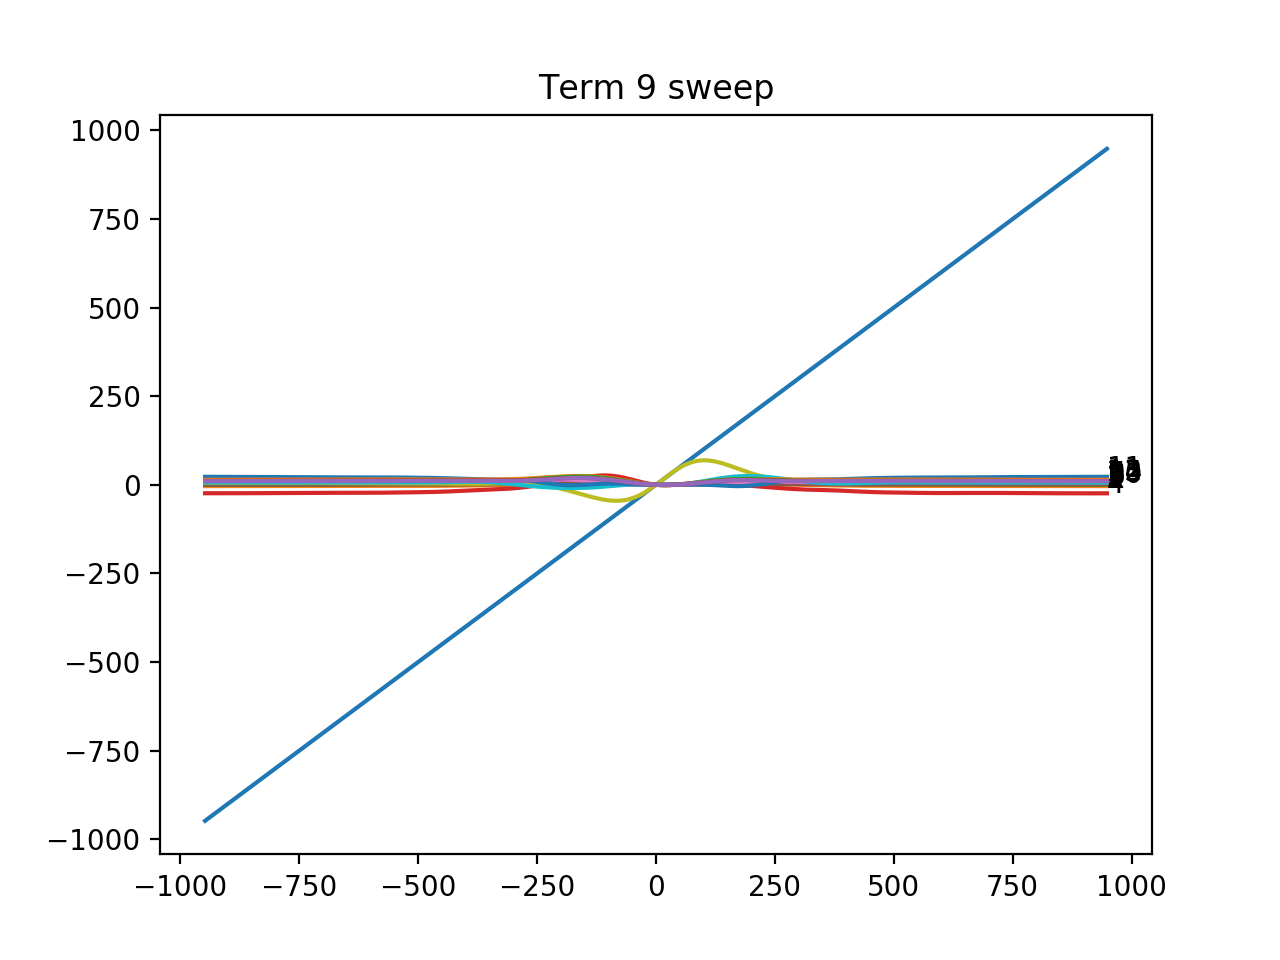

<IPython.core.display.Javascript object>


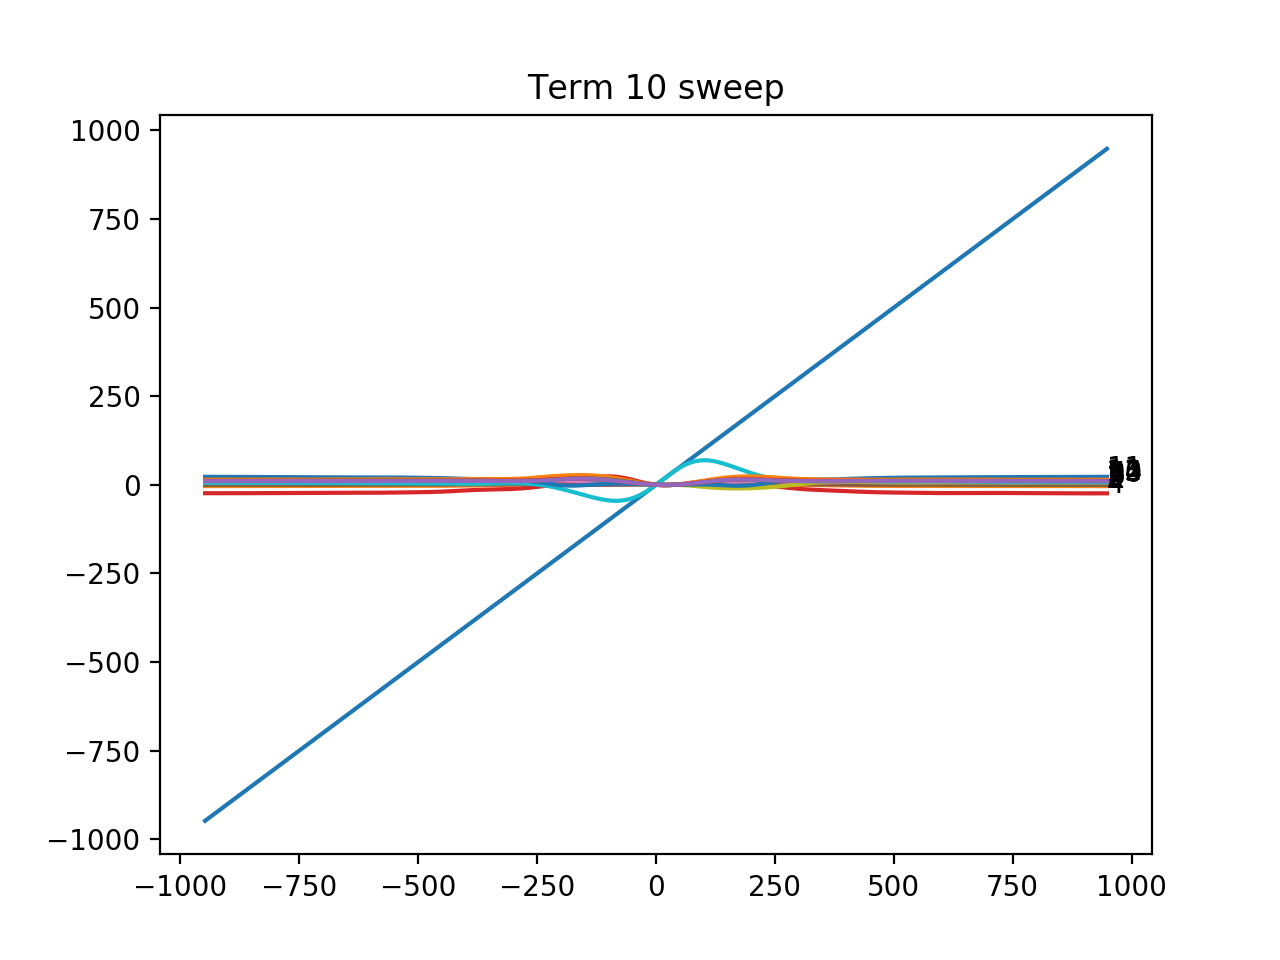

<IPython.core.display.Javascript object>


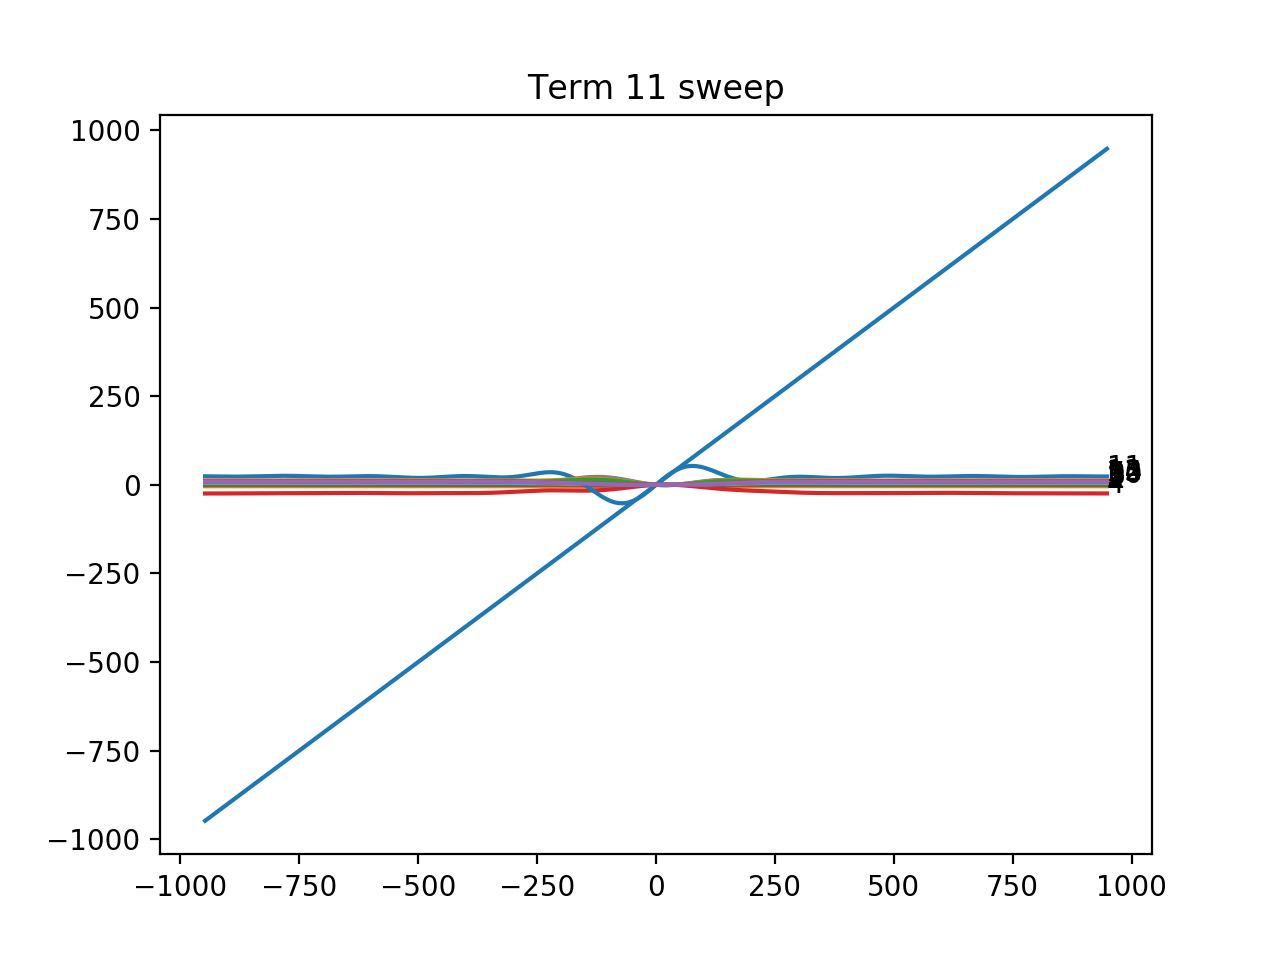

<IPython.core.display.Javascript object>


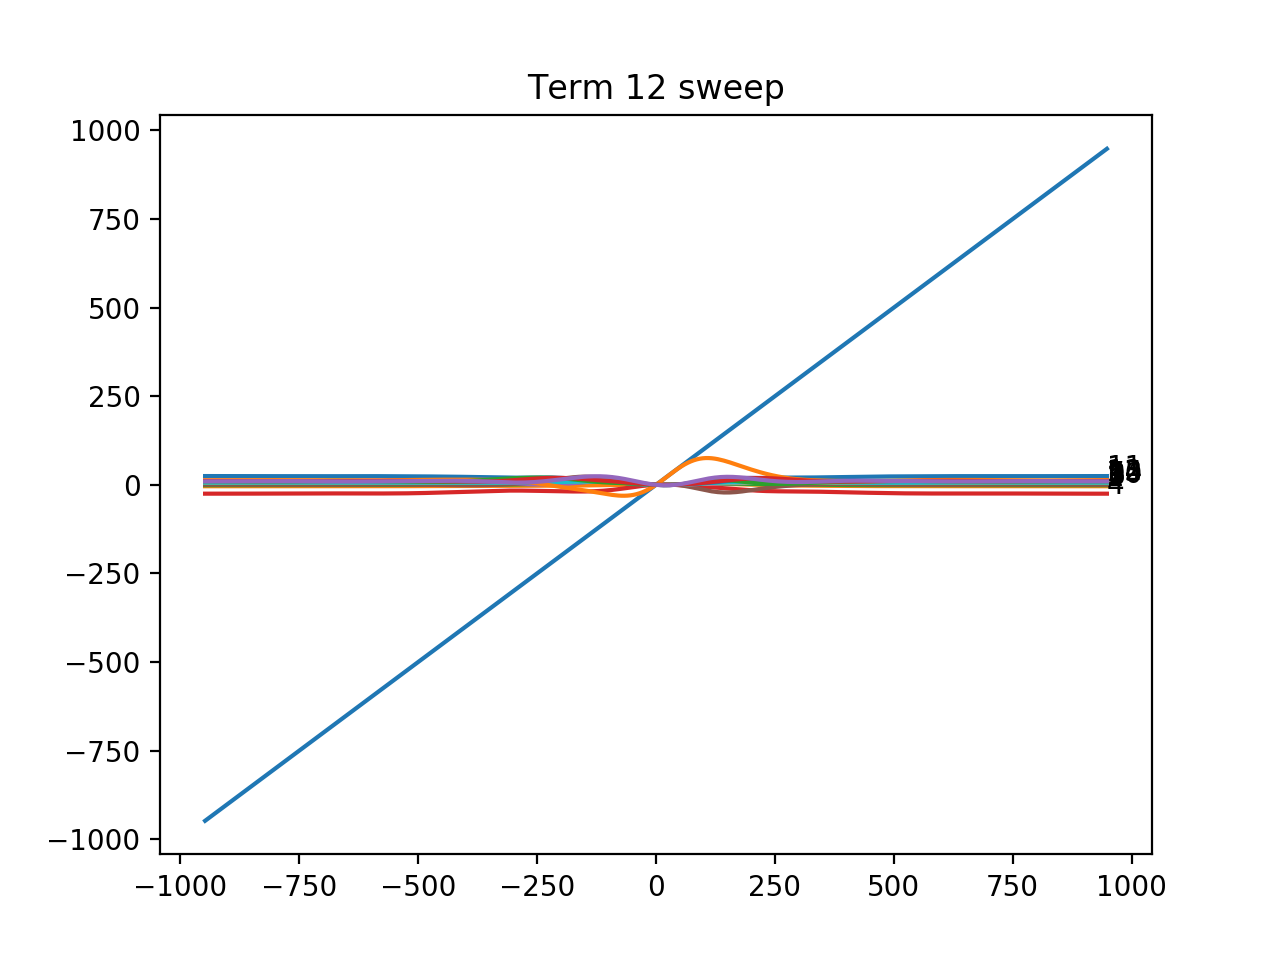

<IPython.core.display.Javascript object>


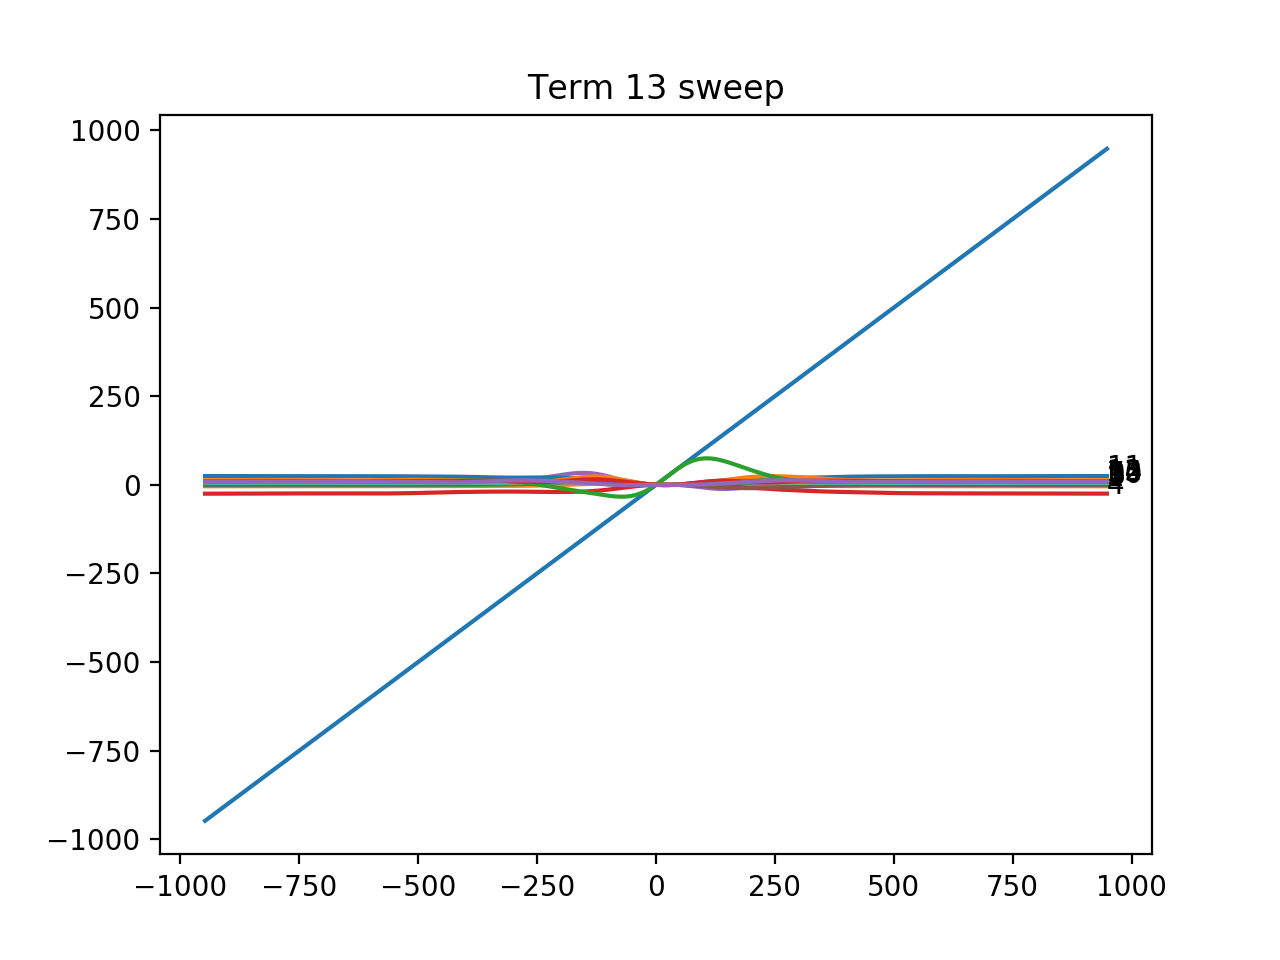

<IPython.core.display.Javascript object>


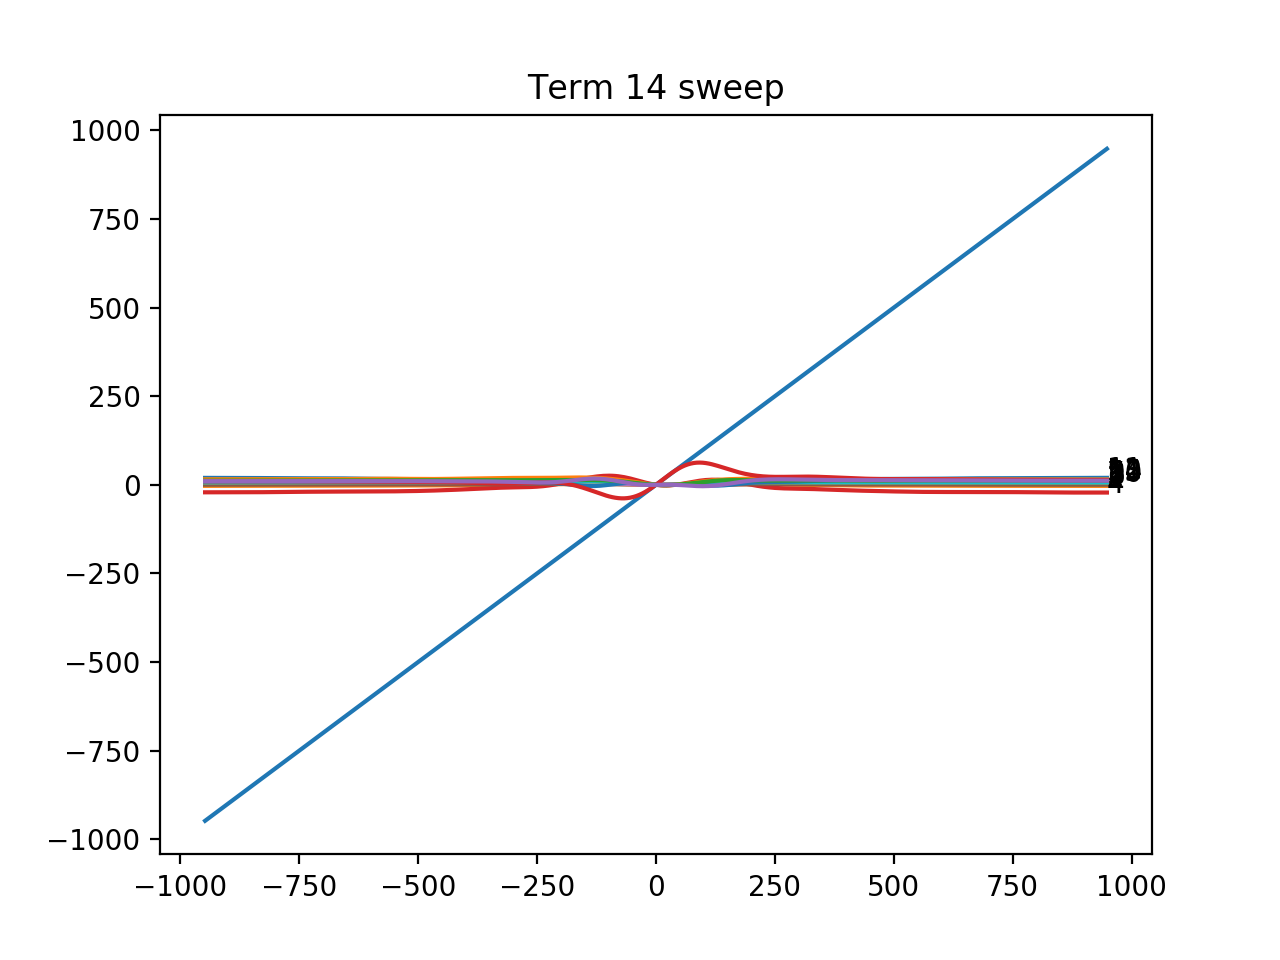

<IPython.core.display.Javascript object>


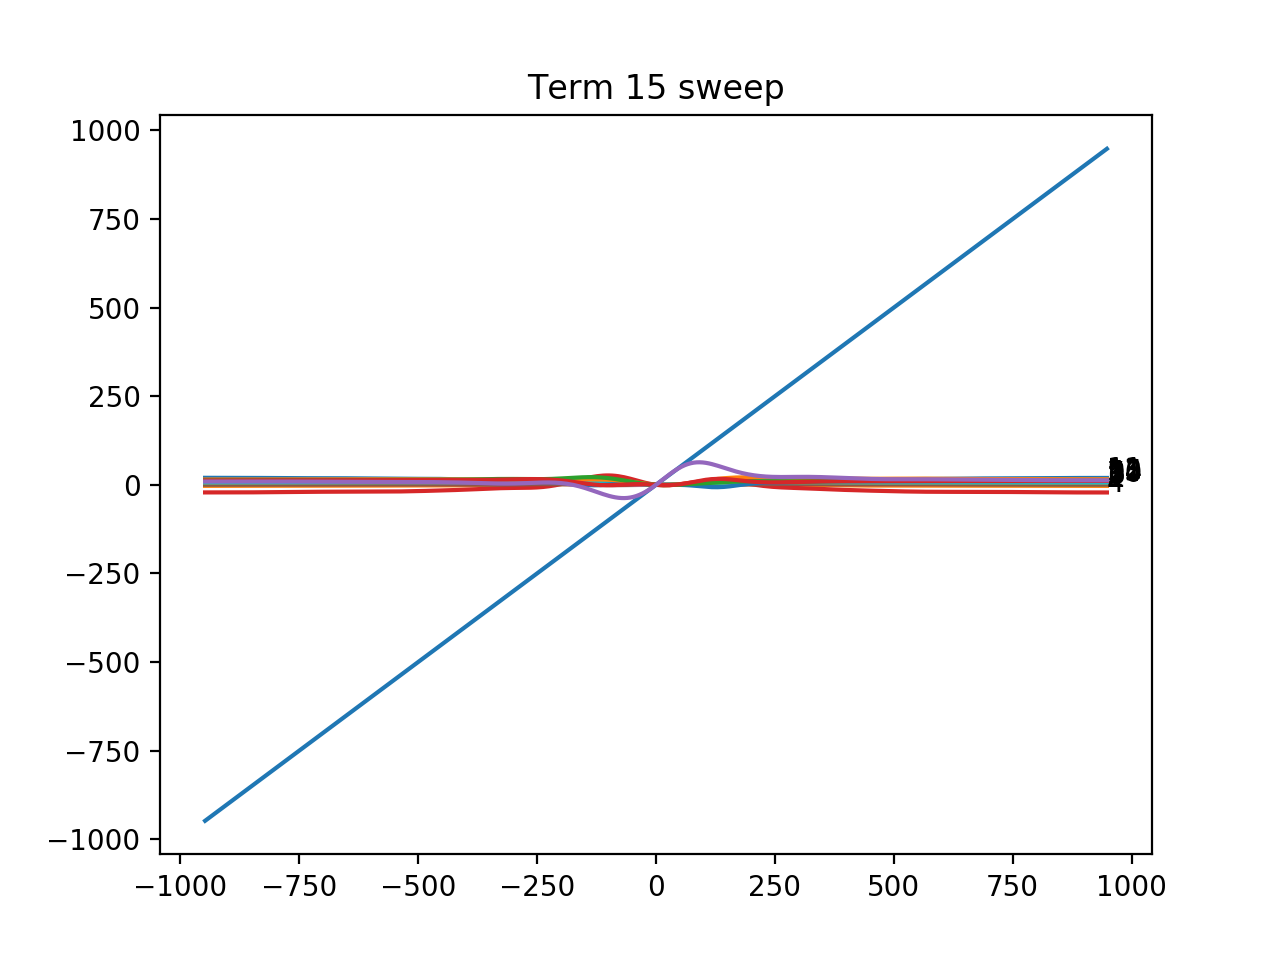

In [57]:

for ii in range(M):
    plt.figure()
    plt.title('Term ' + str(ii+2) + ' sweep')
    plt.plot([-948,948],[-948,948])
#for i in [2,1,]:
    for jj in range(M):
        plt.plot(coeffs_sep[ii,:,ii]*1e9,rec_coeffs[jj,:,ii]*rms_phase_mode*1e9)
        plt.text(coeffs_sep[ii,-1,ii]*1e9,rec_coeffs[jj,-1,ii]*rms_phase_mode*1e9,str(jj+2))
        #plt.set_ylabel('Measured RMS Phase (m)')



In [24]:
truth = np.zeros((K,M))
reconstruction = np.zeros((K,M))
for i in range (M):
    truth[:,i] = coeffs_sep[i,:,i]
    reconstruction[:,i] = rec_coeffs[i,:,i]
    
mat_out = {
    'truth':truth,
    'reconstruction':reconstruction
}

scipy.io.savemat('linear_llowfs',mat_out)

<IPython.core.display.Javascript object>


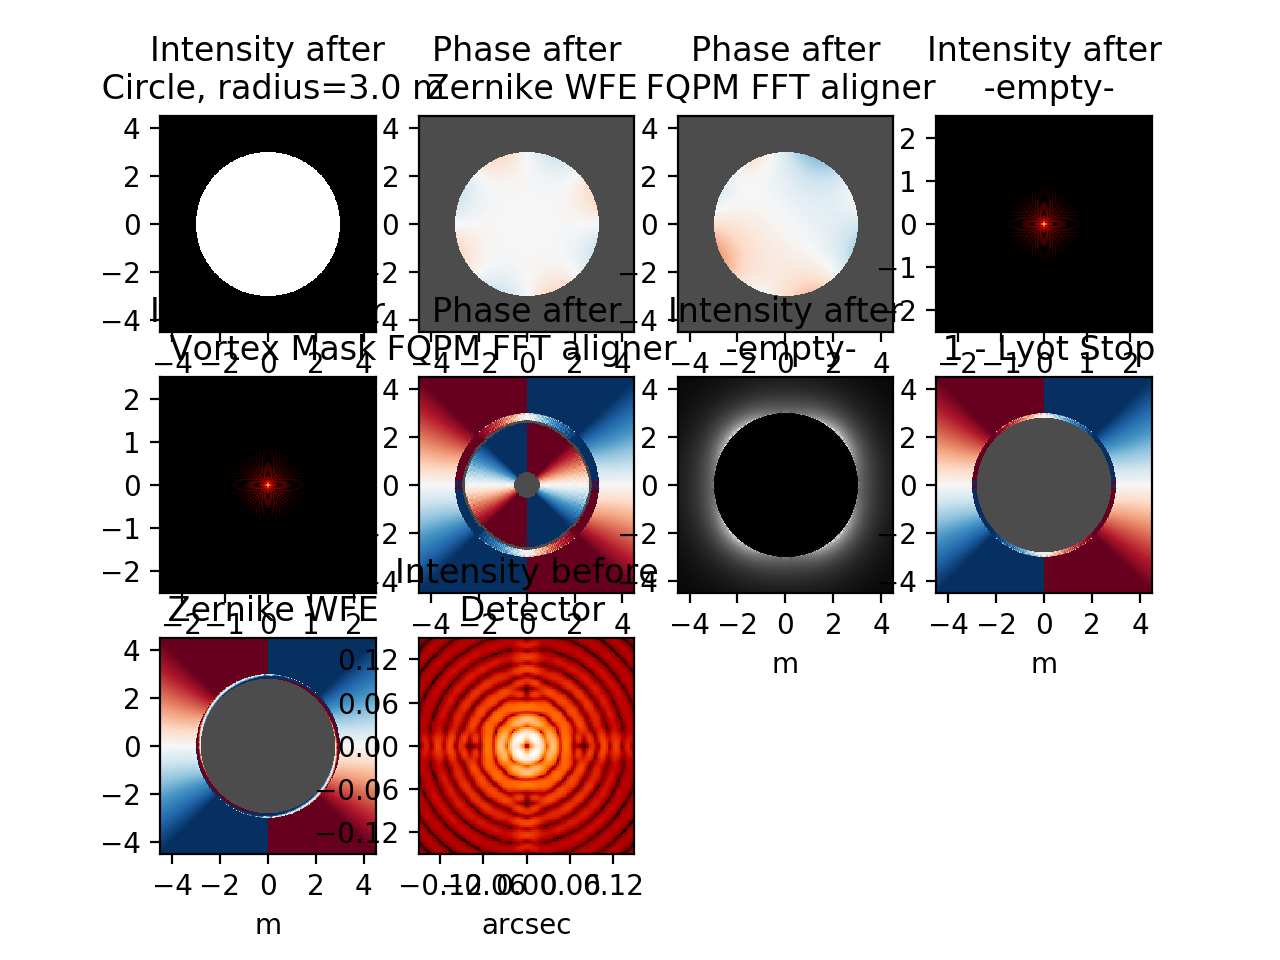

<IPython.core.display.Javascript object>


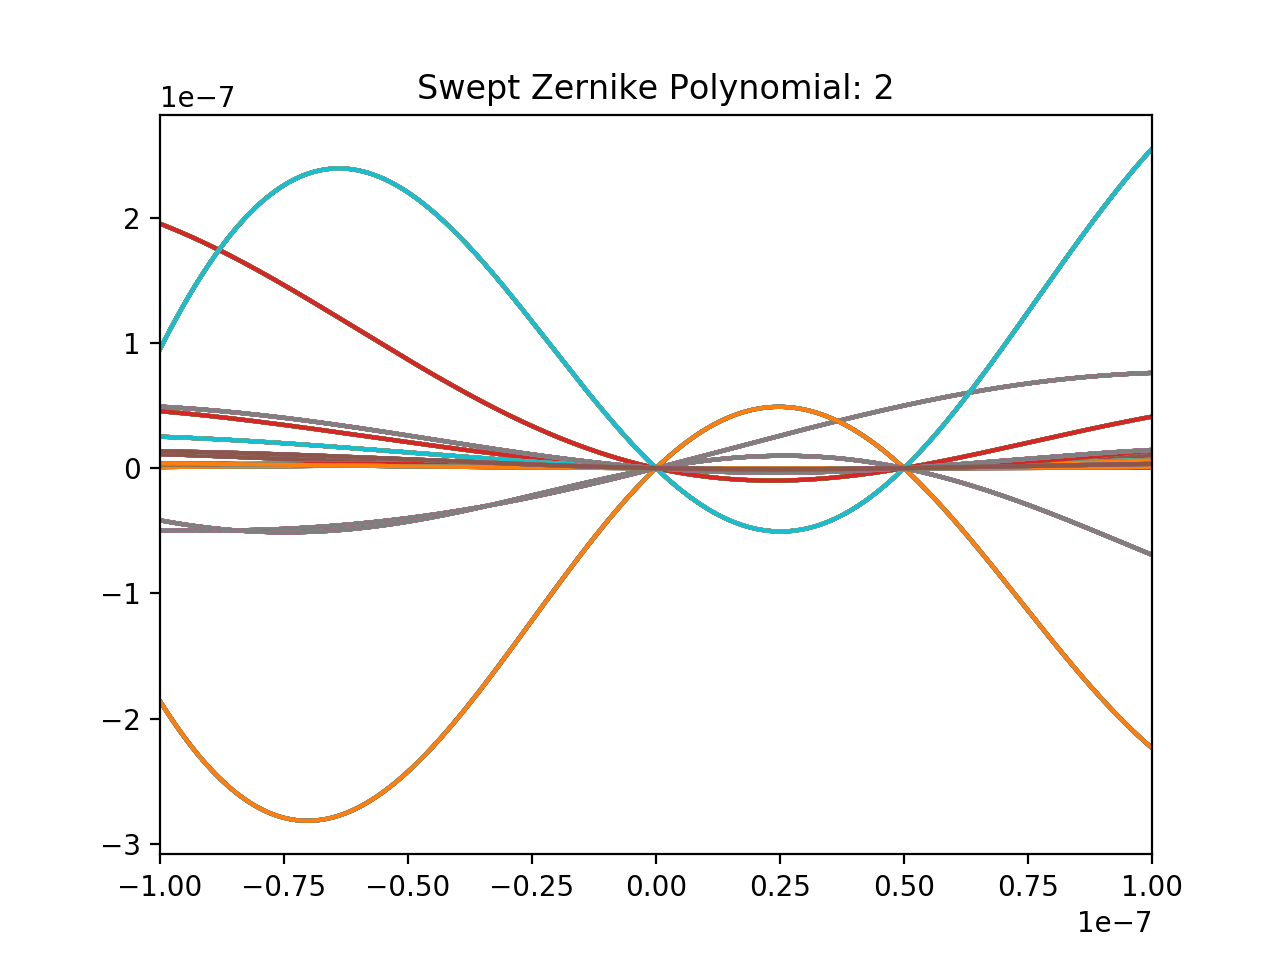

<IPython.core.display.Javascript object>


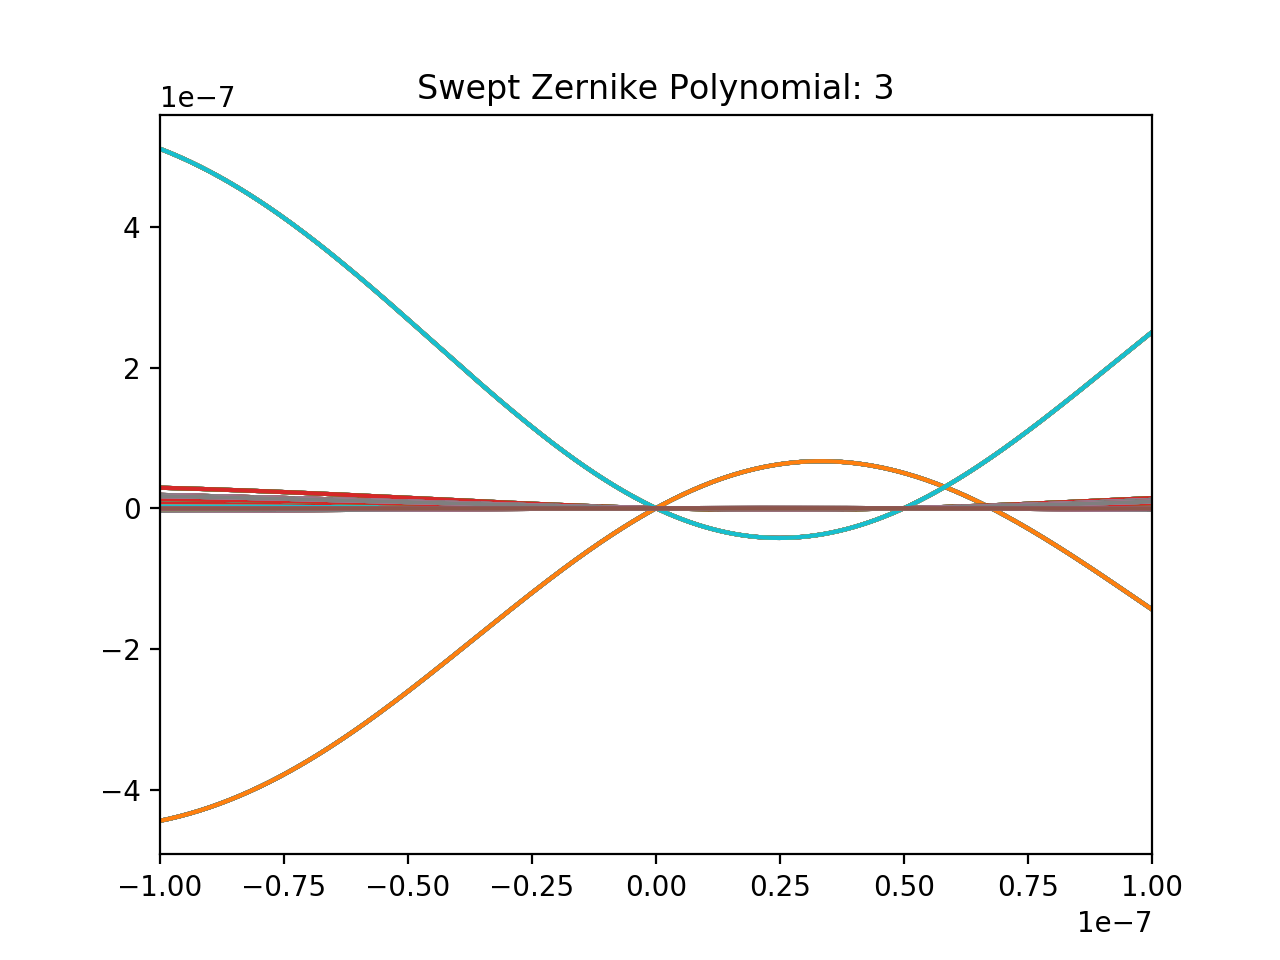

<IPython.core.display.Javascript object>


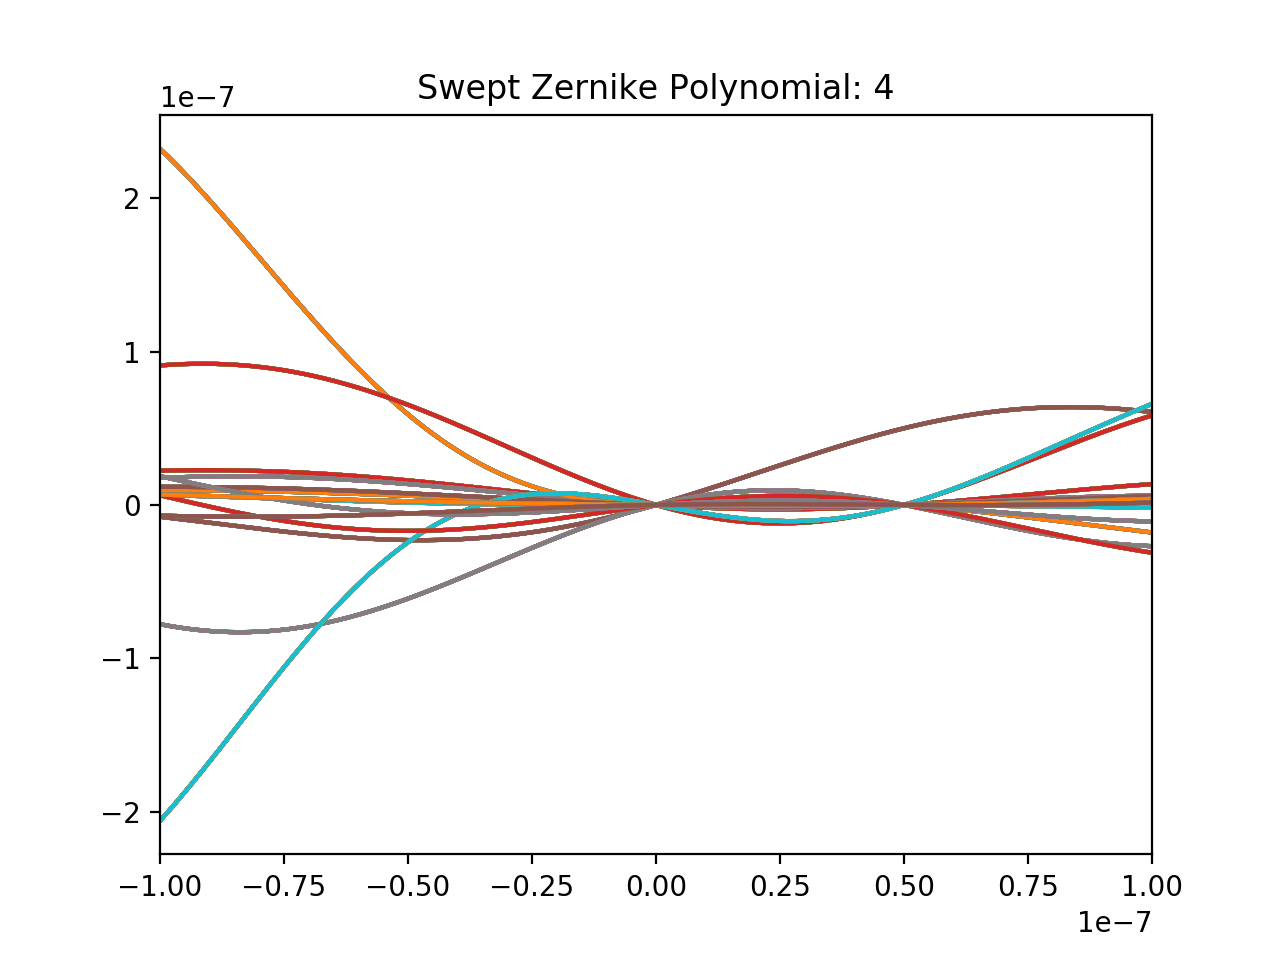

<IPython.core.display.Javascript object>


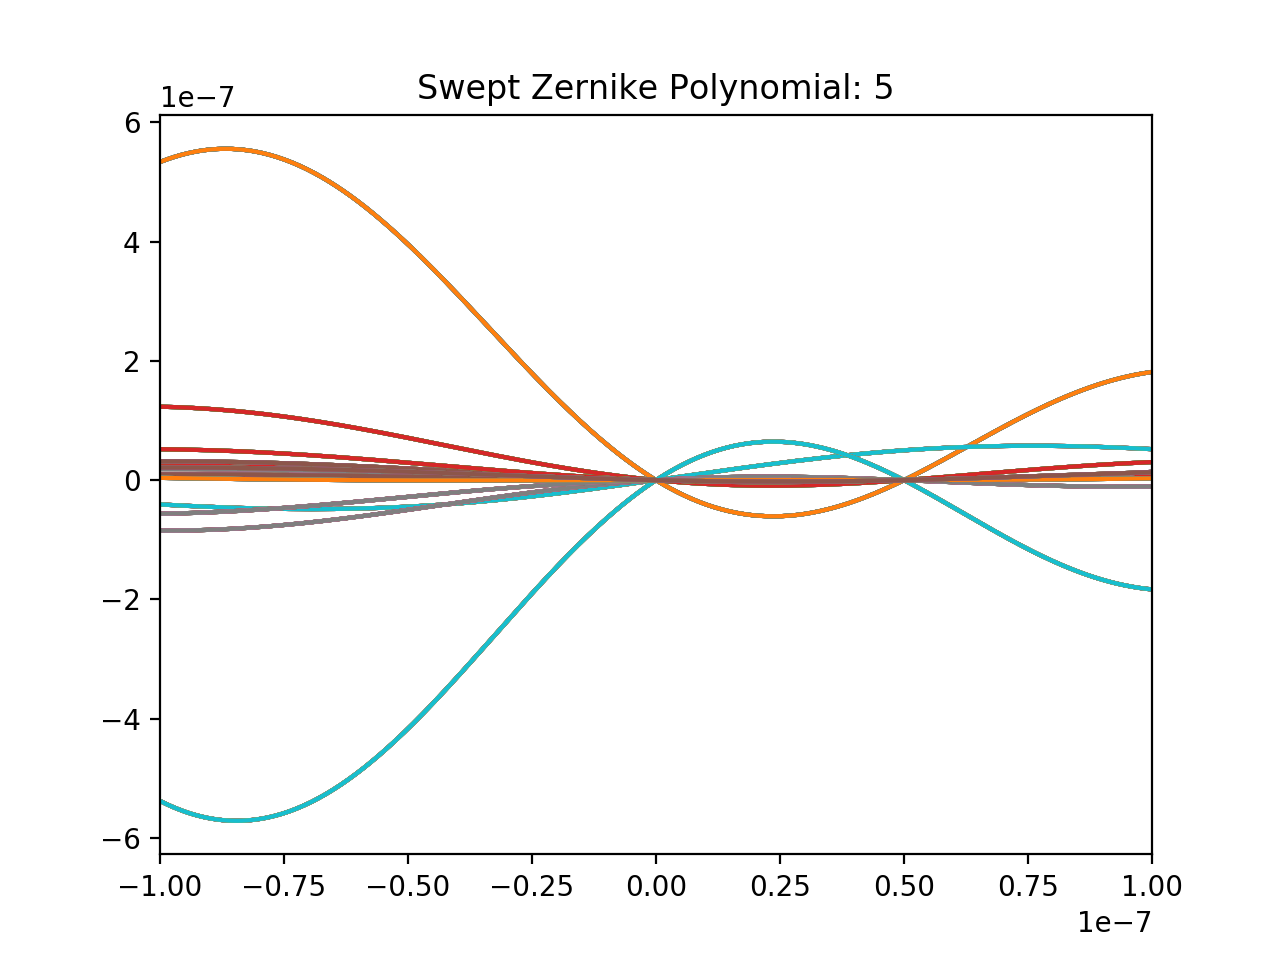

<IPython.core.display.Javascript object>


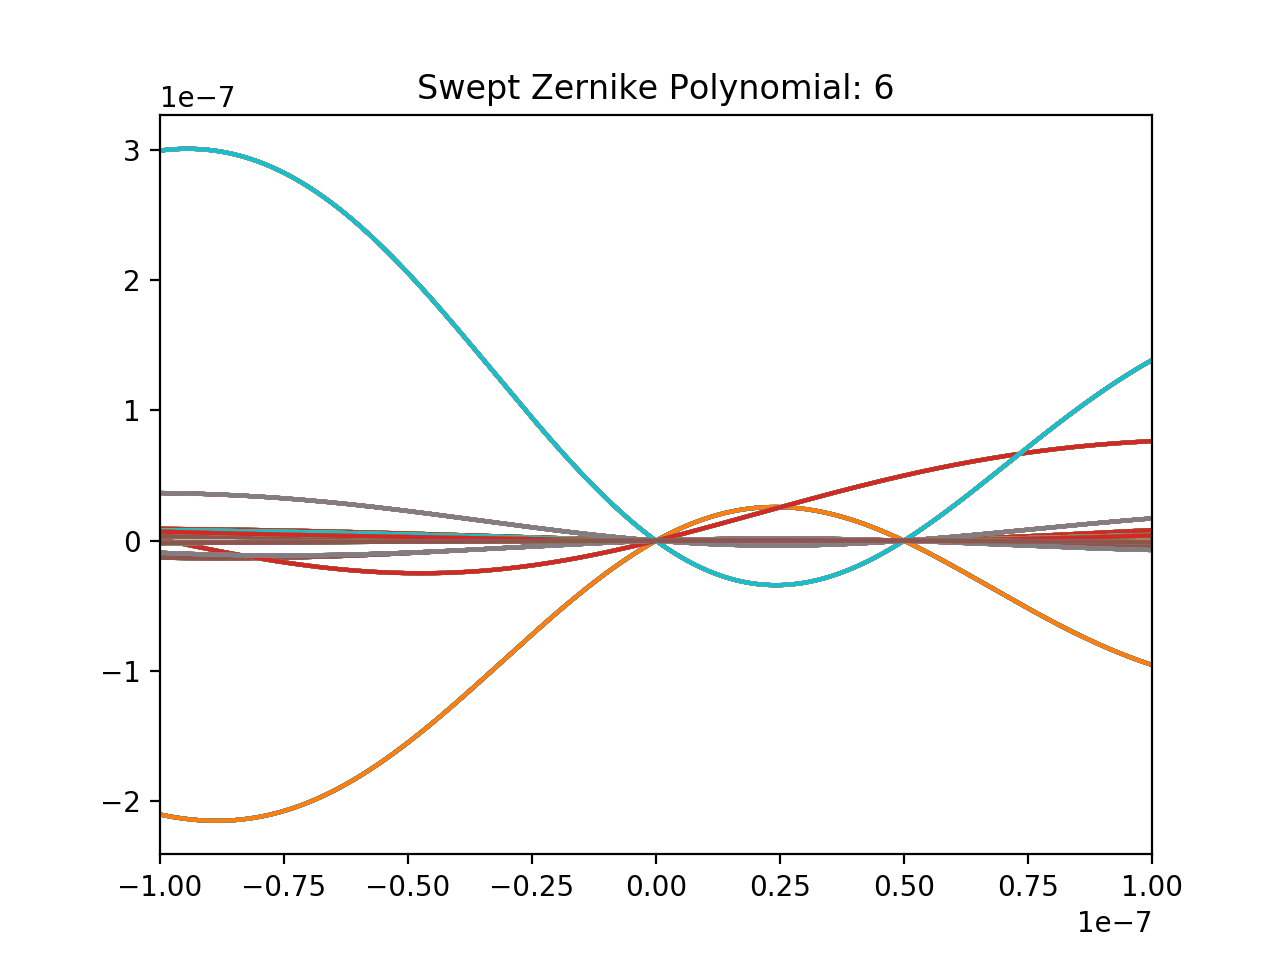

<IPython.core.display.Javascript object>


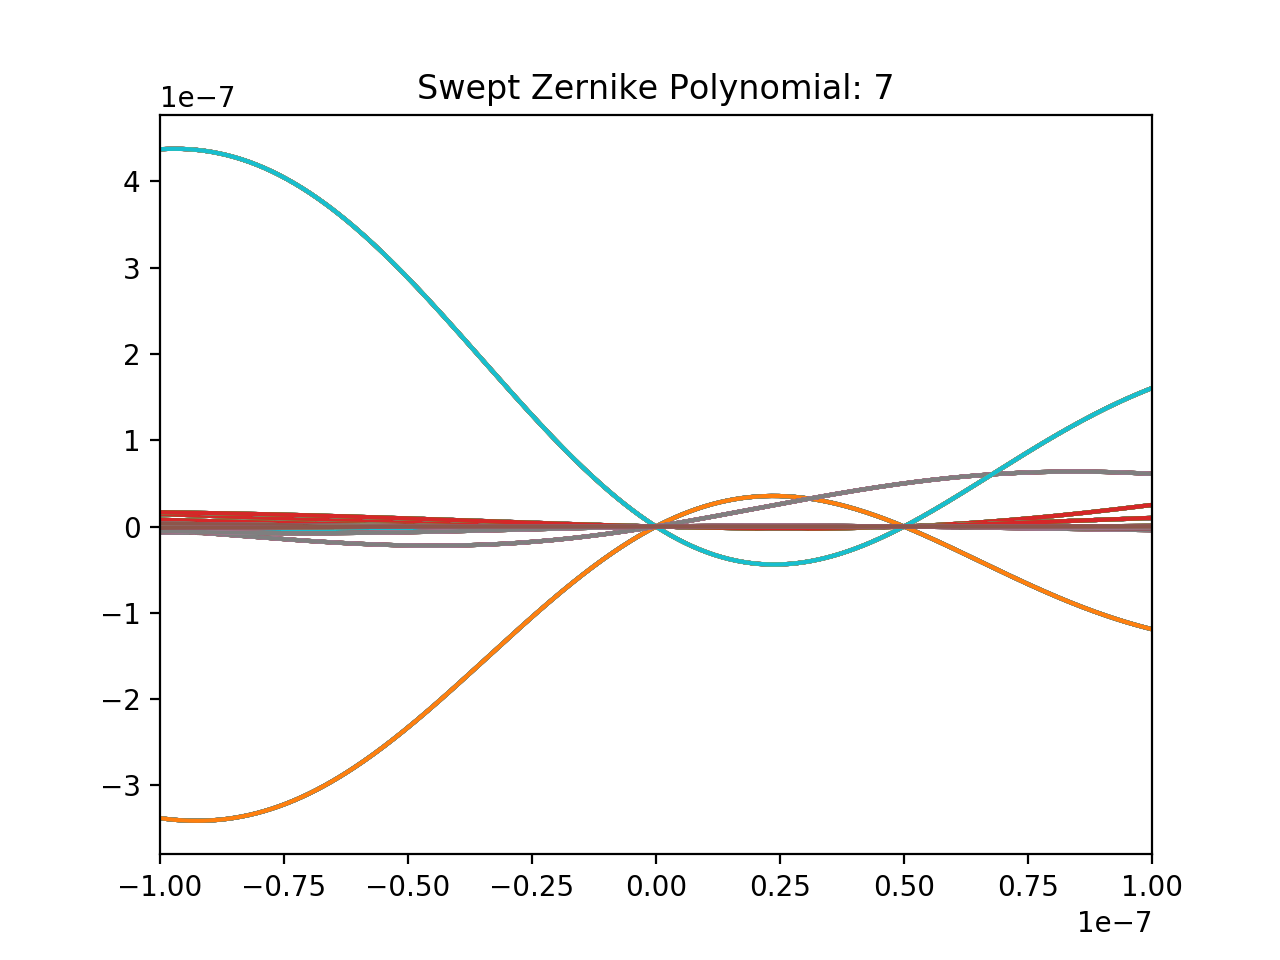

<IPython.core.display.Javascript object>


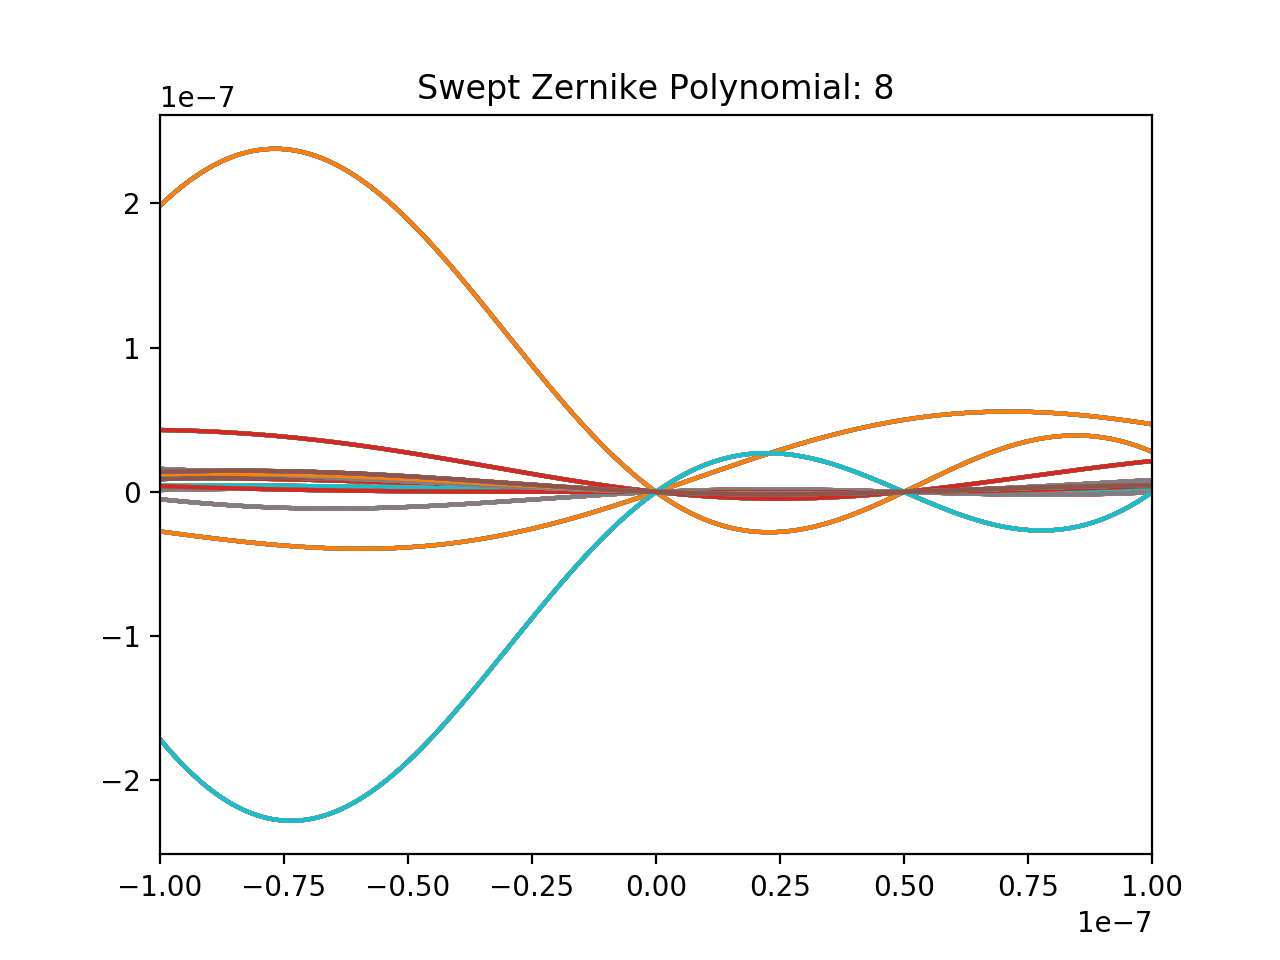

<IPython.core.display.Javascript object>


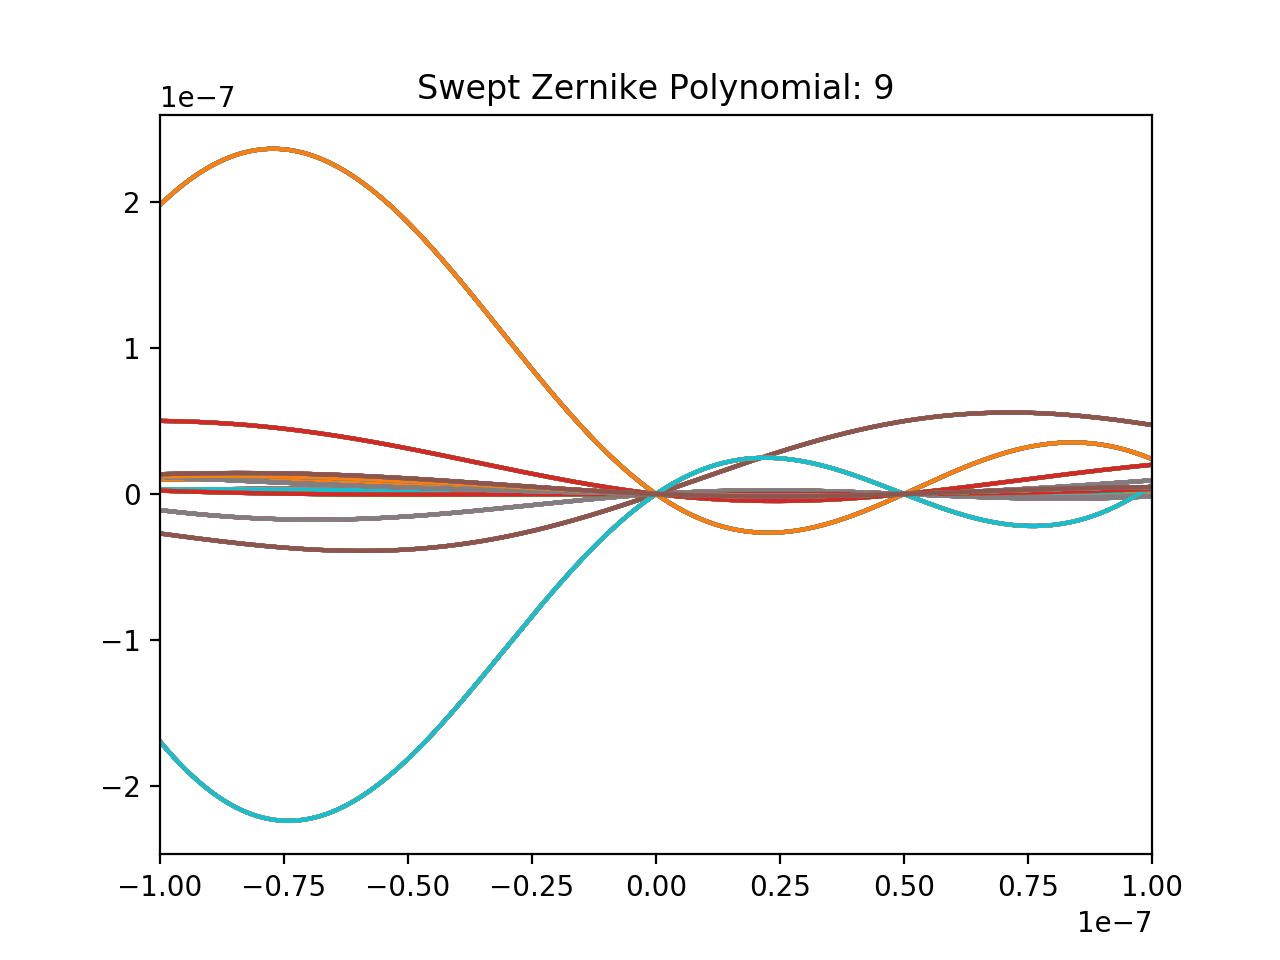

<IPython.core.display.Javascript object>


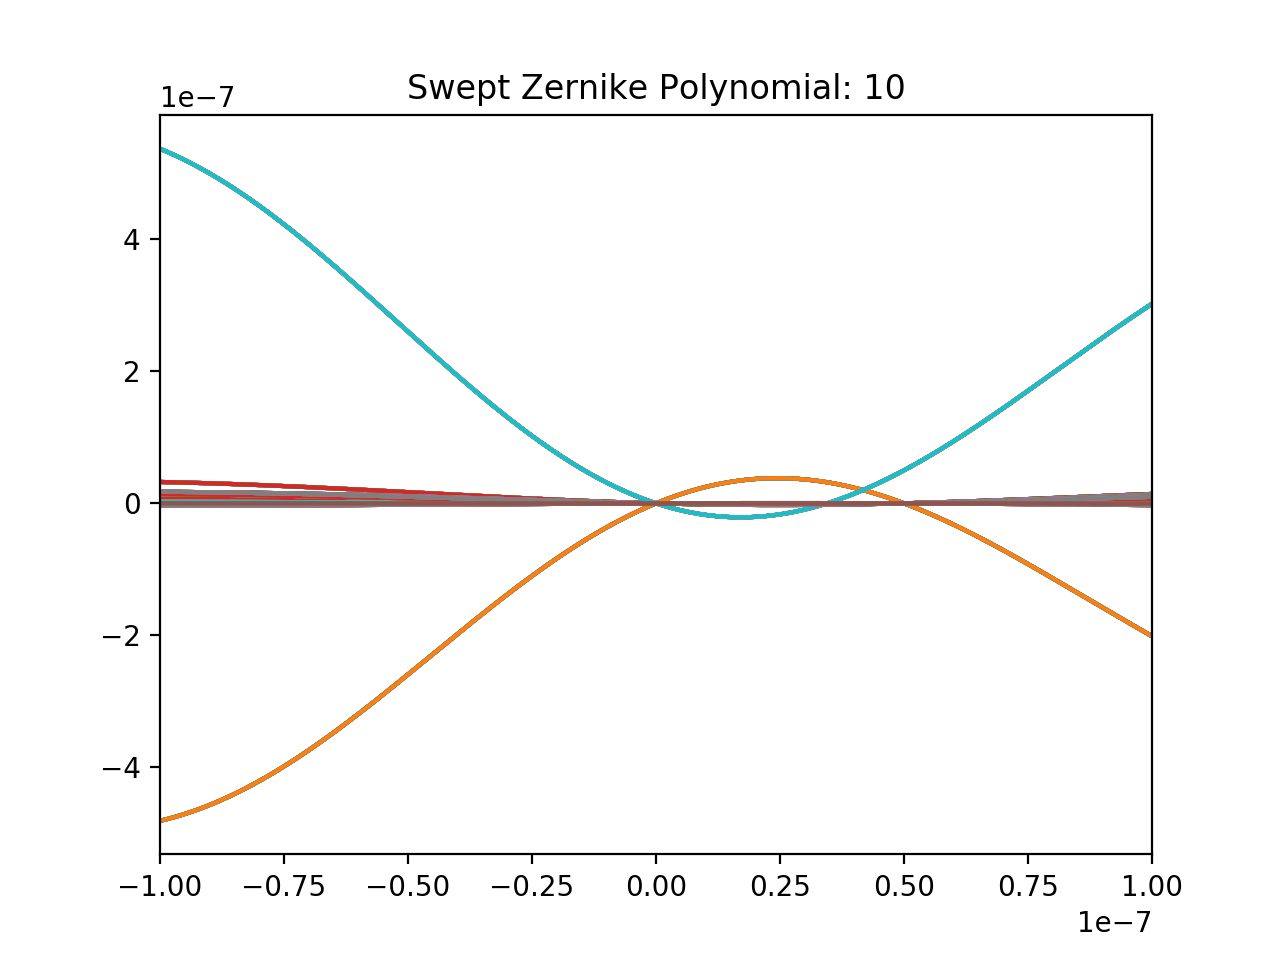

<IPython.core.display.Javascript object>


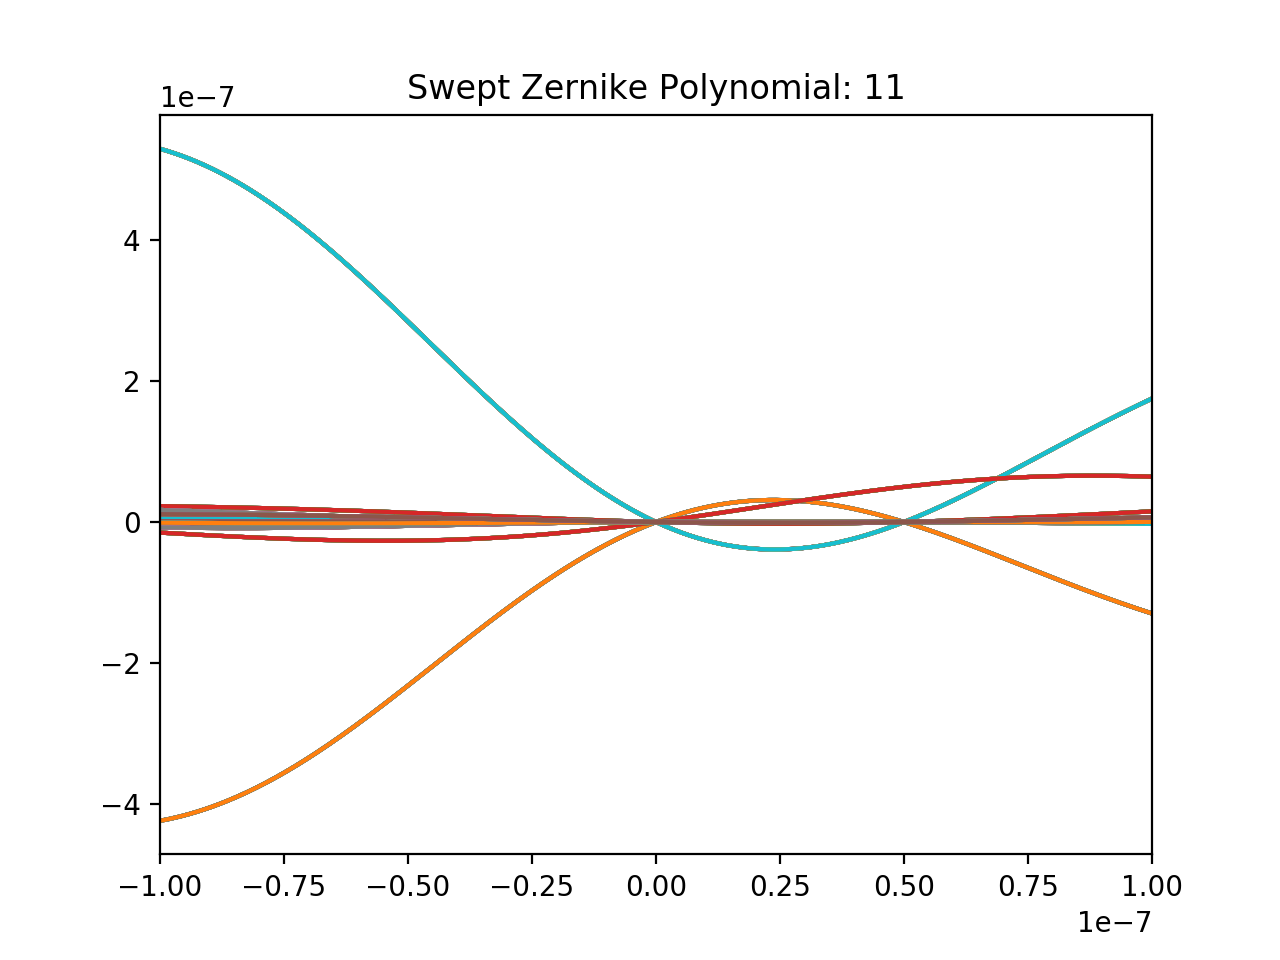

<IPython.core.display.Javascript object>


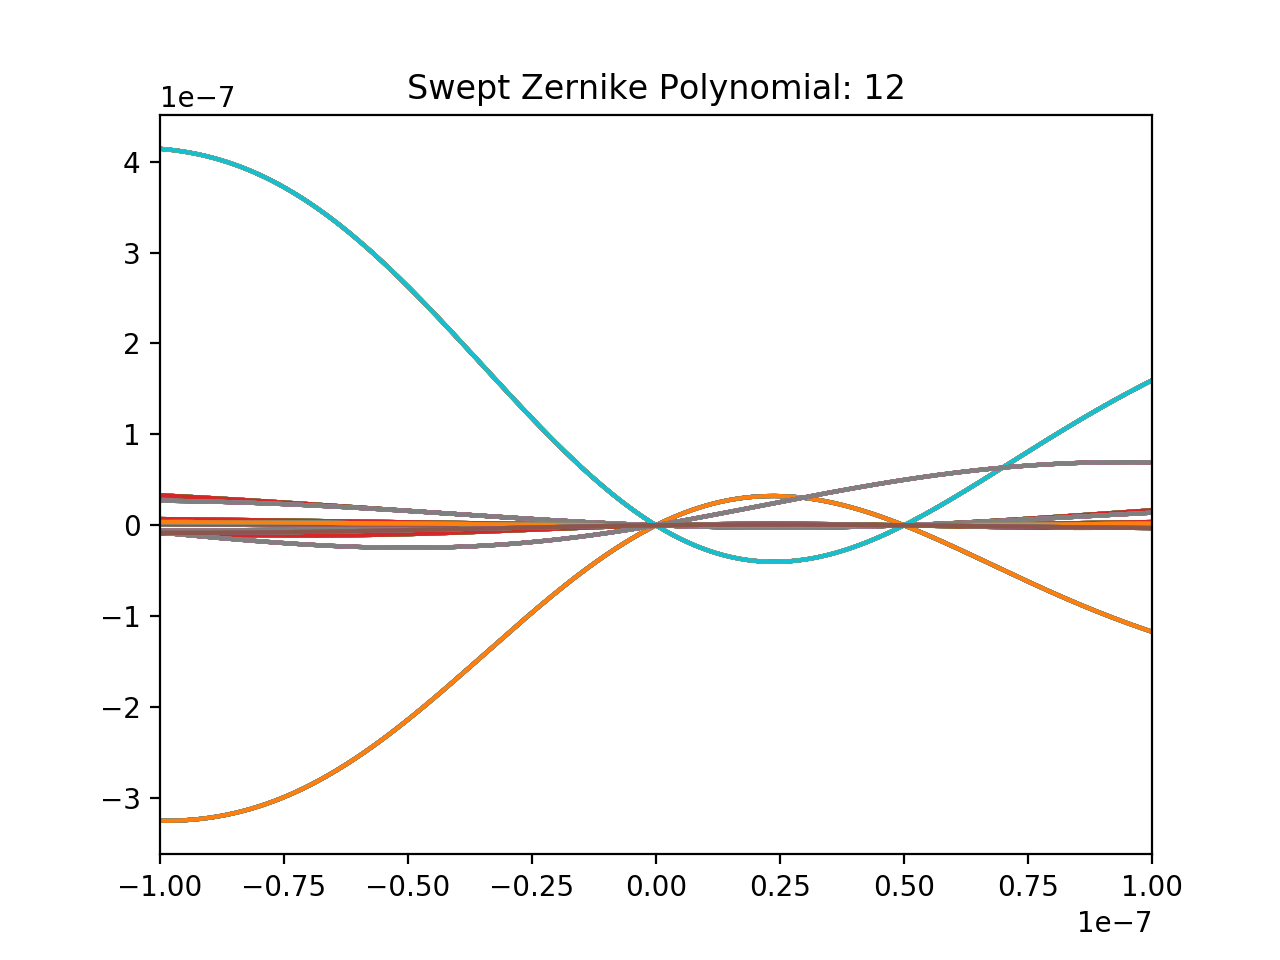

<IPython.core.display.Javascript object>


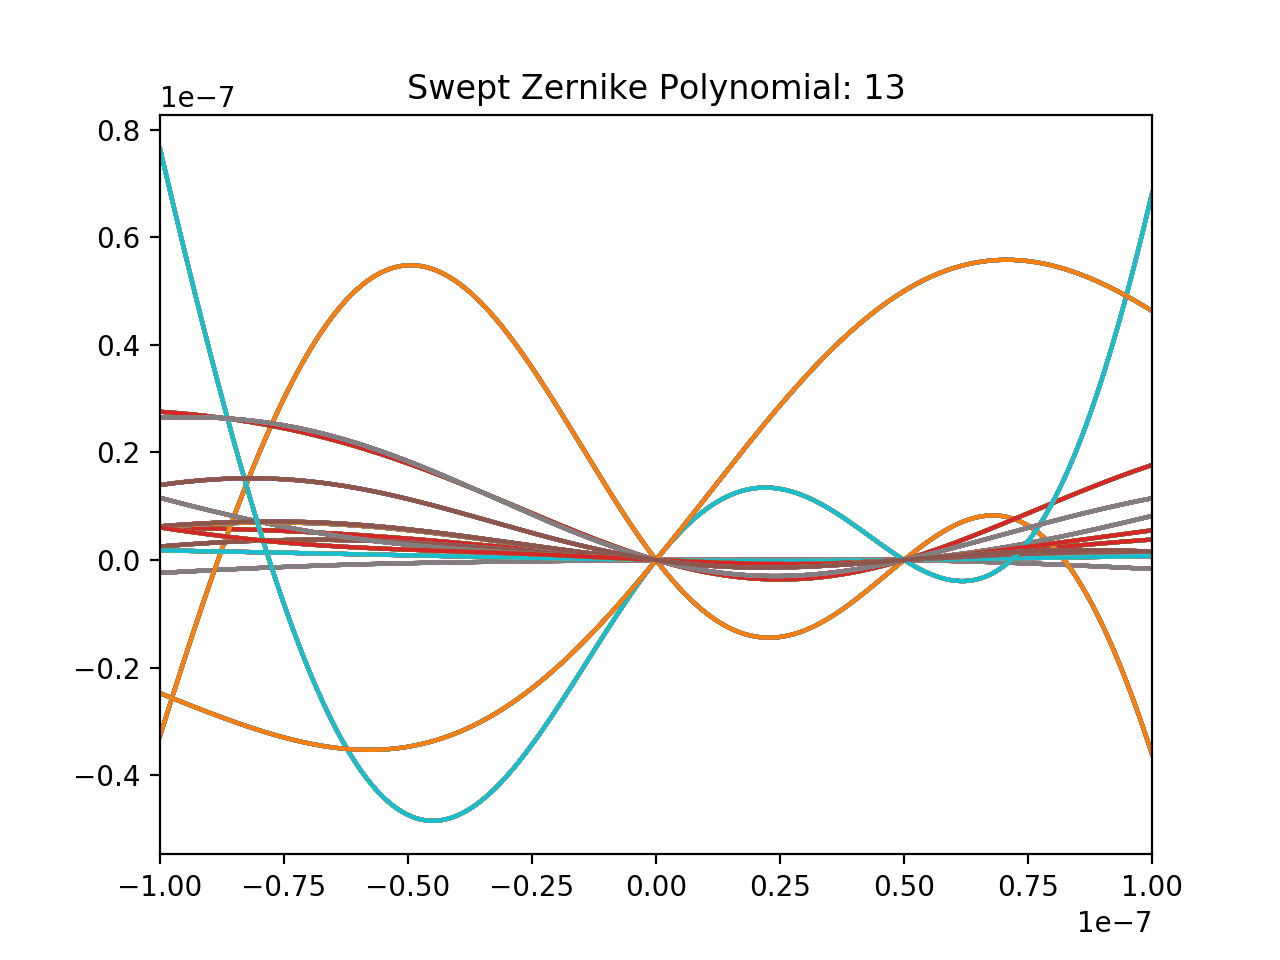

<IPython.core.display.Javascript object>


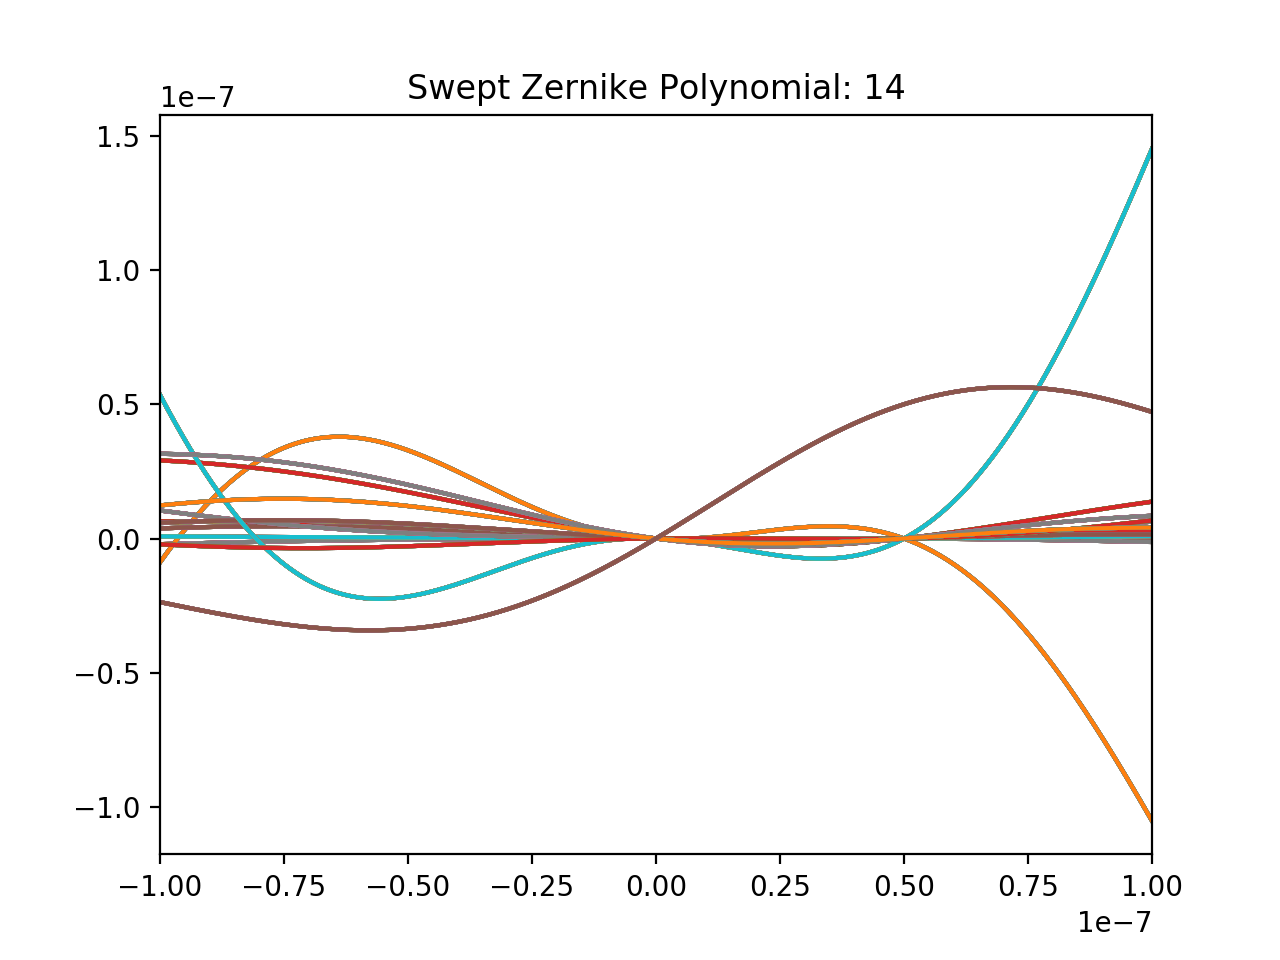

In [25]:
for i in range(M): #loop over coefficients
    plt.figure()
    #for j in range(K): #loop over examples
    truth[:,i] = coeffs_sep[i,:,i]
    for k in range(M): 
        resultsvec = rec_coeffs[k,:,i]*rms_phase_mode
        plt.plot(truth,resultsvec)
        plt.xlim([-100.0*1e-9,100.0*1e-9])
    plt.title('Swept Zernike Polynomial: '+str(i+1))
        #plt.ylim([-50,50])